## 데이터 읽어오기

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
rc('font', family='AppleGothic') # matplot 한글폰트

plt.rcParams['axes.unicode_minus'] = False
job_opening_2021_df = pd.read_csv('2021_연령대별_산업대분류별_일자리.csv', encoding='cp949')
salary_2021_df = pd.read_csv('2021_산업_학력_연령계층_성별_임금_및_근로조건.csv', encoding='cp949')

job_salary_2021_df = pd.merge(job_opening_2021_df, salary_2021_df, on=['연령대별','산업대분류별',]) # 두 df 합치기


In [2]:
# print(job_salary_2021_df.index)
print(job_salary_2021_df.columns)
job_salary_2021_df.head(30)

Index(['연령대별', '산업대분류별', '일자리 총 계', '신규 채용 일자리 총 계', '신규 기업 생성 일자리',
       '기업 내 신규 대체 일자리', '평균근속년수 (년)', '총근로시간 (시간)', '월임금총액 (천원)', '근로일수 (일)',
       '초과근로시간 (시간)'],
      dtype='object')


,연령대별,산업대분류별,일자리 총 계,신규 채용 일자리 총 계,신규 기업 생성 일자리,기업 내 신규 대체 일자리,평균근속년수 (년),총근로시간 (시간),월임금총액 (천원),근로일수 (일),초과근로시간 (시간)
0,총 계,총 계,2557.8,624.6,104.0,520.6,7.0,177.5,3858,21.8,9.6
1,총 계,"농업, 임업 및 어업",14.6,4.8,1.3,3.5,9.2,178.1,3567,22.3,4.8
2,총 계,광업,1.3,0.2,0.0,0.2,8.6,198.9,4306,23.4,22.2
3,총 계,제조업,497.5,98.6,9.1,89.5,8.2,189.9,4060,22.2,18.3
4,총 계,"전기, 가스, 증기 및 공기 조절 공급업",12.9,1.9,1.1,0.8,13.1,178.4,6365,21.3,10.0
5,총 계,"수도, 하수 및 폐기물 처리, 원료 재생업",11.5,2.3,0.1,2.2,7.5,190.3,4002,22.8,14.1
6,총 계,건설업,209.4,78.9,7.0,71.9,6.1,179.4,3987,22.0,6.6
7,총 계,도매 및 소매업,320.1,83.2,24.4,58.8,6.5,174.8,3851,21.9,4.9
8,총 계,운수 및 창고업,126.7,23.5,4.6,18.8,8.2,174.4,3546,21.5,11.9
9,총 계,숙박 및 음식점업,156.9,47.9,11.5,36.4,3.8,172.2,2357,21.7,8.4


## 산업대분류별, 연령대별을 one- hot 인코딩처리

In [3]:
# '산업대분류별', '연령대별'을 더미 변수로 변환
df_with_dummies = pd.get_dummies(job_salary_2021_df, columns=['산업대분류별', '연령대별']) #산업대분류별, 연령대별을 원 핫 인코딩처리

df_with_dummies.drop(['산업대분류별_총 계', '연령대별_총 계'], axis=1, inplace=True) # 원핫 인코딩 된것중 "전체" 더미 변수 제거.다중 공선성방지

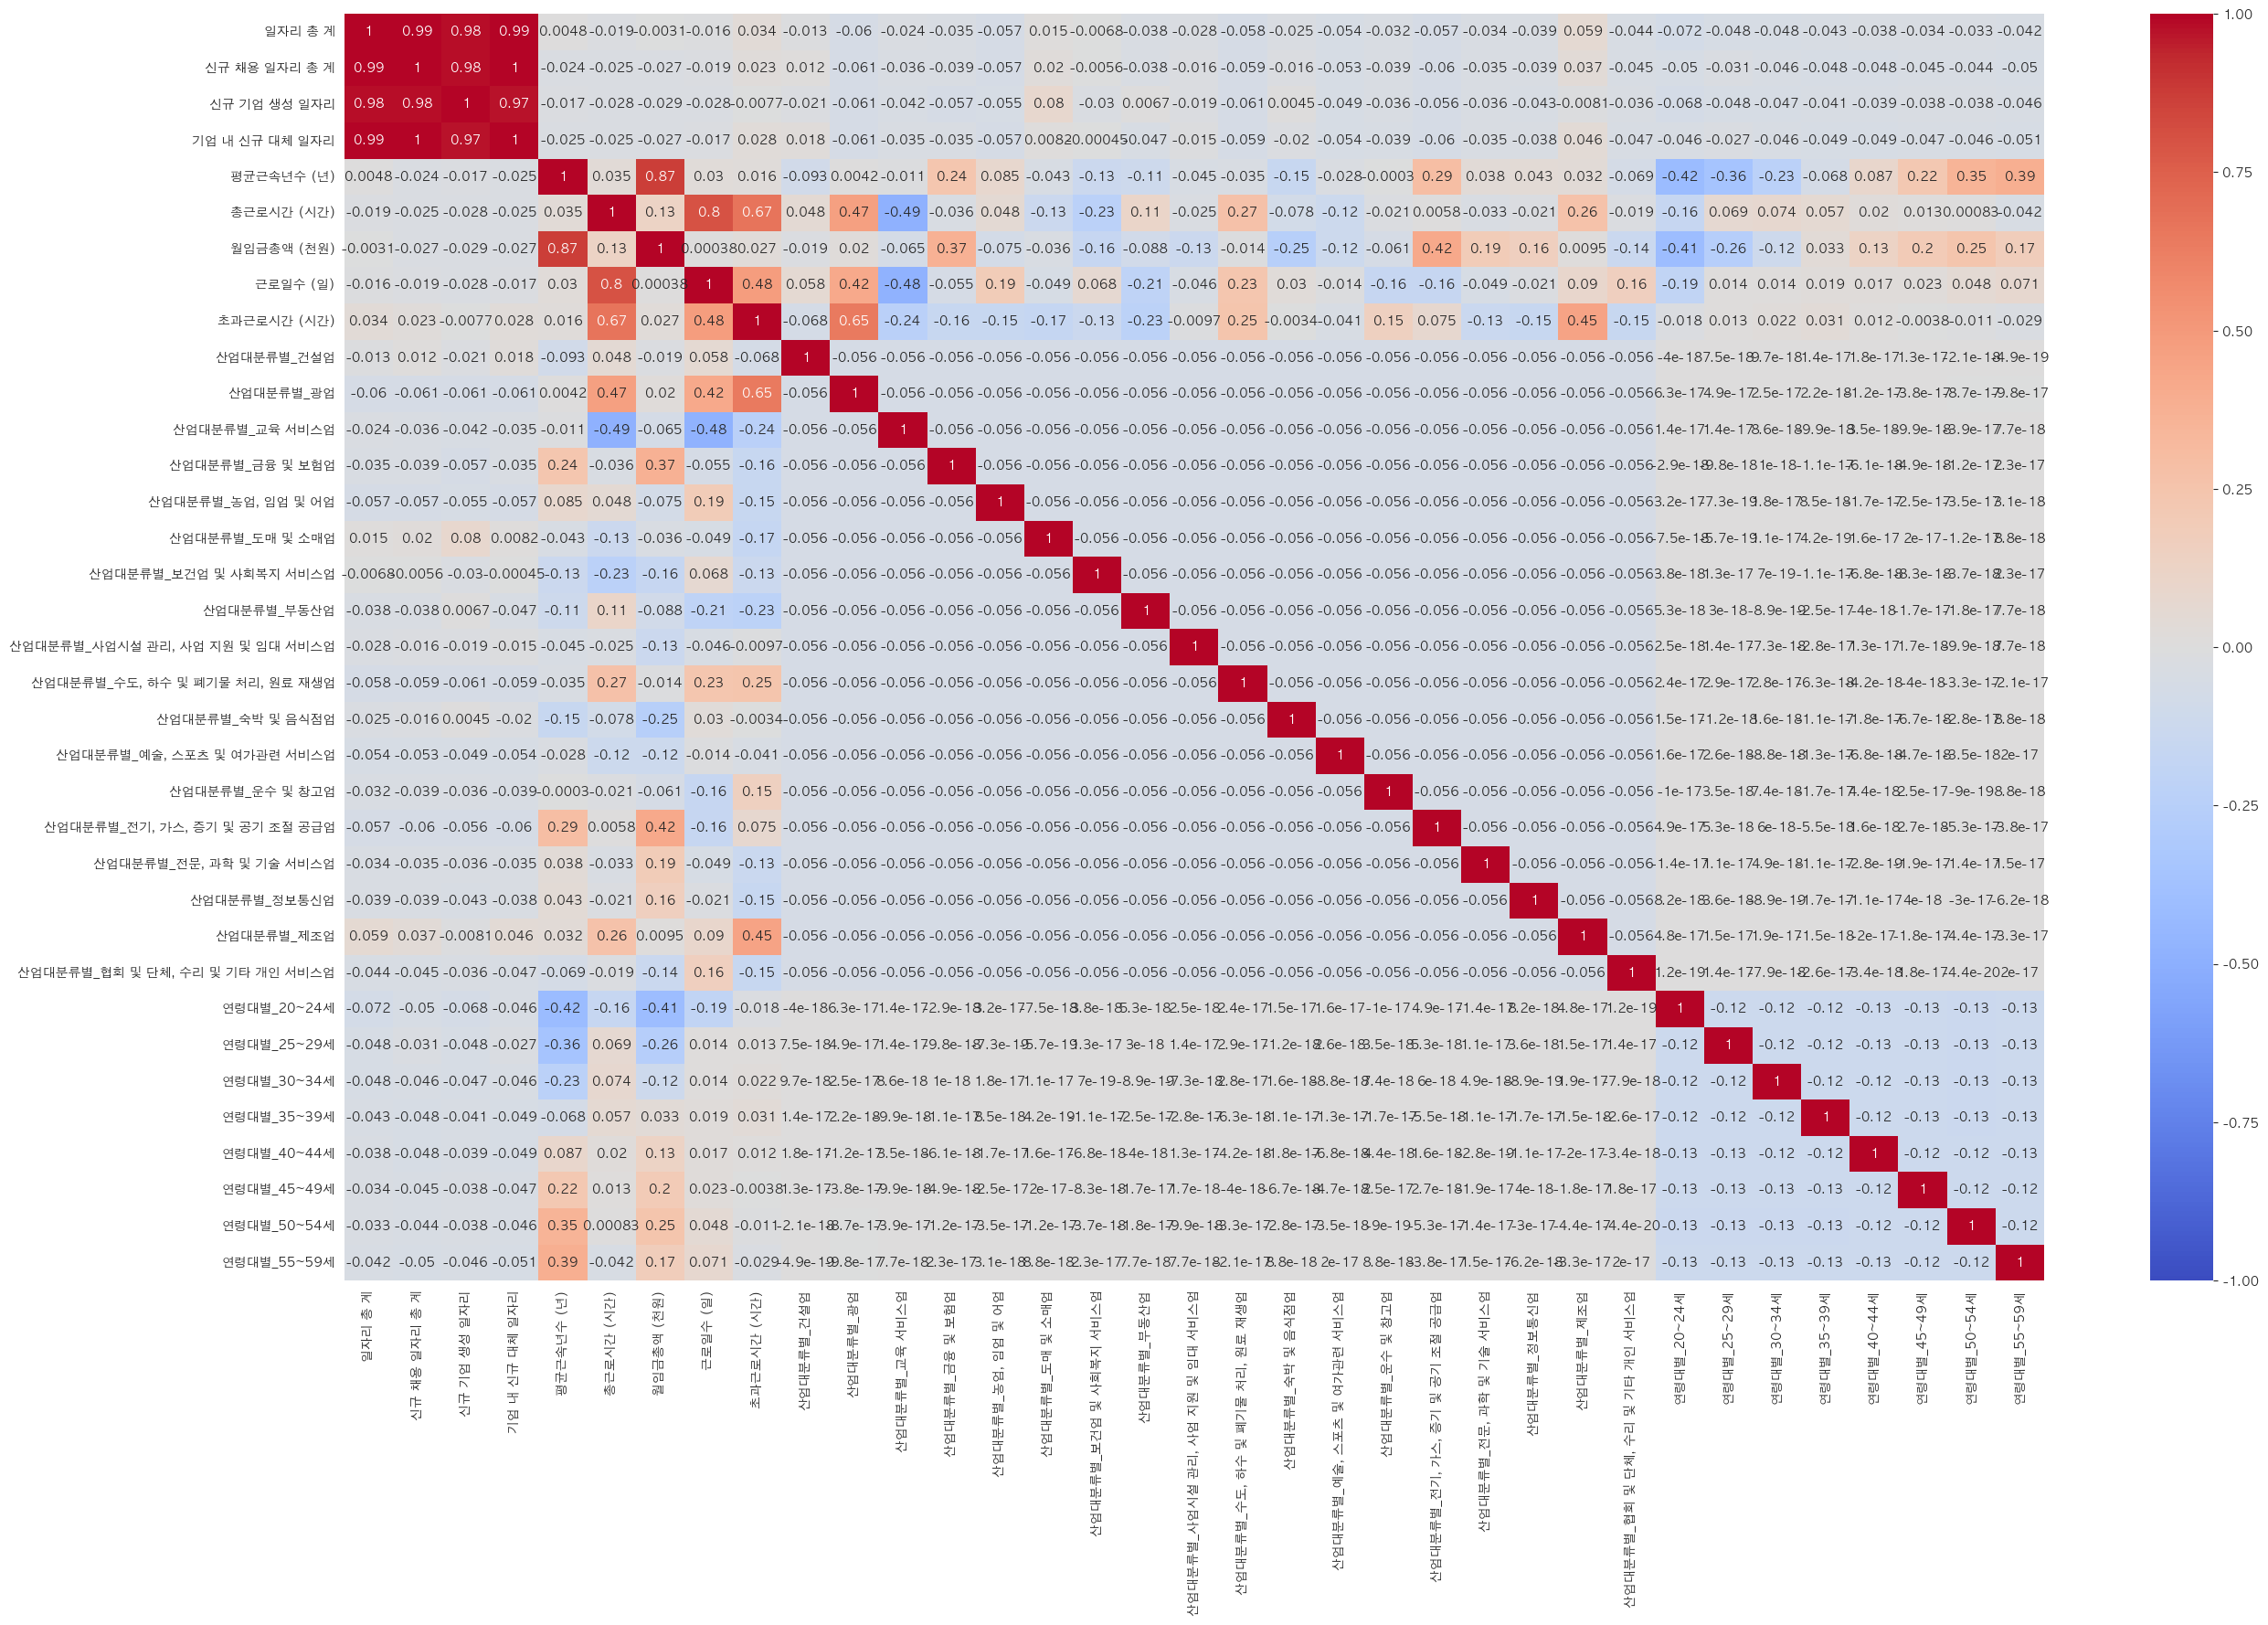

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_with_dummies.corr()

plt.figure(figsize=(30, 18))
sns.heatmap(corr_matrix, cmap='coolwarm', annot = True, vmin=-1, vmax=1)
plt.show()


## 독립 변수 표준화를 위한 스케일 작업

In [5]:
from sklearn.preprocessing import StandardScaler

continuous_cols = ['총근로시간 (시간)', '평균근속년수 (년)',
                   '근로일수 (일)','초과근로시간 (시간)',
        '일자리 총 계', '신규 채용 일자리 총 계',
        '신규 기업 생성 일자리', '기업 내 신규 대체 일자리']

scaler = StandardScaler()

df_with_dummies[continuous_cols] = scaler.fit_transform(df_with_dummies[continuous_cols])


# 각 산업에 대한 Ridge 회귀 분석

In [6]:
from sklearn.linear_model import Ridge


industry_categories = [col for col in df_with_dummies if col.startswith('산업대분류별_')]

results_dict = {}

for industry in industry_categories:

    mask = (df_with_dummies[industry] == 1) # 산업 카테고리가 1인 row를 선택하는 마스크 생성
    df_industry = df_with_dummies[mask]

    # 회귀분석
    X_industry = df_industry[['총근로시간 (시간)', '평균근속년수 (년)',
                     '근로일수 (일)','초과근로시간 (시간)',
        '일자리 총 계', '신규 채용 일자리 총 계',
        '신규 기업 생성 일자리', '기업 내 신규 대체 일자리']
                              + [col for col in df_with_dummies if col.startswith('연령대별_')]]
    y_industry = df_industry['월임금총액 (천원)']


    ridge = Ridge(alpha = 0.5) # 알파 값은 중간값인 0.5로

    ridge.fit(X_industry, y_industry)

    results_dict[industry] = ridge # 모델 저장

print("Coefficients for '산업대분류별_농업, 임업 및 어업': ", results_dict['산업대분류별_농업, 임업 및 어업'].coef_)


Coefficients for '산업대분류별_농업, 임업 및 어업':  [-205.75769781  537.45715529 -166.88122028 -196.16198208   -6.92989158
  -10.15061165  -14.36144924   -9.14941792 -253.40399999  -51.94409355
   98.32467864   92.42547364   45.1483137    98.89436579  170.66175011
  -84.7823258 ]


## 요소별 상위 top3 하위 bottom3

In [7]:
feature_names = ['총근로시간 (시간)', '평균근속년수 (년)',
                     '근로일수 (일)','초과근로시간 (시간)',
        '일자리 총 계', '신규 채용 일자리 총 계',
        '신규 기업 생성 일자리', '기업 내 신규 대체 일자리']+ [col for col in df_with_dummies if col.startswith('연령대별_')]

# 초기화
feature_to_top_industries = {feature: [] for feature in feature_names} # 상위 top3
feature_to_bottom_industries = {feature: [] for feature in feature_names} # 하위 top3


for industry, model in results_dict.items(): # 각 산업별로
    # 각 요소 별로
    for feature, coef in zip(feature_names, model.coef_):
        feature_to_top_industries[feature].append((coef, industry))
        feature_to_bottom_industries[feature].append((coef, industry))


for feature in feature_names:

    feature_to_top_industries[feature].sort(reverse=True) # 내림차순 정렬
    feature_to_bottom_industries[feature].sort()


    top_industries = feature_to_top_industries[feature][:3] # 상위 top3
    bottom_industries = feature_to_bottom_industries[feature][:3] # 하위 top3


    print(f"For the feature '{feature}', the top 3 industries are:")
    for i, (coef, industry) in enumerate(top_industries, start=1):
        print(f"{i}. {industry} with coefficient {coef}")
    print("And the bottom 3 industries are:")
    for i, (coef, industry) in enumerate(bottom_industries, start=1):
        print(f"{i}. {industry} with coefficient {coef}")


For the feature '총근로시간 (시간)', the top 3 industries are:
1. 산업대분류별_정보통신업 with coefficient 334.49407503783124
2. 산업대분류별_금융 및 보험업 with coefficient 257.85942240606283
3. 산업대분류별_협회 및 단체, 수리 및 기타 개인 서비스업 with coefficient 239.53408097903386
And the bottom 3 industries are:
1. 산업대분류별_농업, 임업 및 어업 with coefficient -205.75769780536857
2. 산업대분류별_전기, 가스, 증기 및 공기 조절 공급업 with coefficient -162.5185341456288
3. 산업대분류별_교육 서비스업 with coefficient -131.94541529173824
For the feature '평균근속년수 (년)', the top 3 industries are:
1. 산업대분류별_전문, 과학 및 기술 서비스업 with coefficient 1212.74077577233
2. 산업대분류별_금융 및 보험업 with coefficient 1096.737193324261
3. 산업대분류별_정보통신업 with coefficient 934.8323812727733
And the bottom 3 industries are:
1. 산업대분류별_숙박 및 음식점업 with coefficient 104.79546694531939
2. 산업대분류별_보건업 및 사회복지 서비스업 with coefficient 343.7631930573676
3. 산업대분류별_운수 및 창고업 with coefficient 392.9401430125426
For the feature '근로일수 (일)', the top 3 industries are:
1. 산업대분류별_정보통신업 with coefficient 426.5538489471554
2. 산업대분류별_협회 및 단체, 

## 시각화

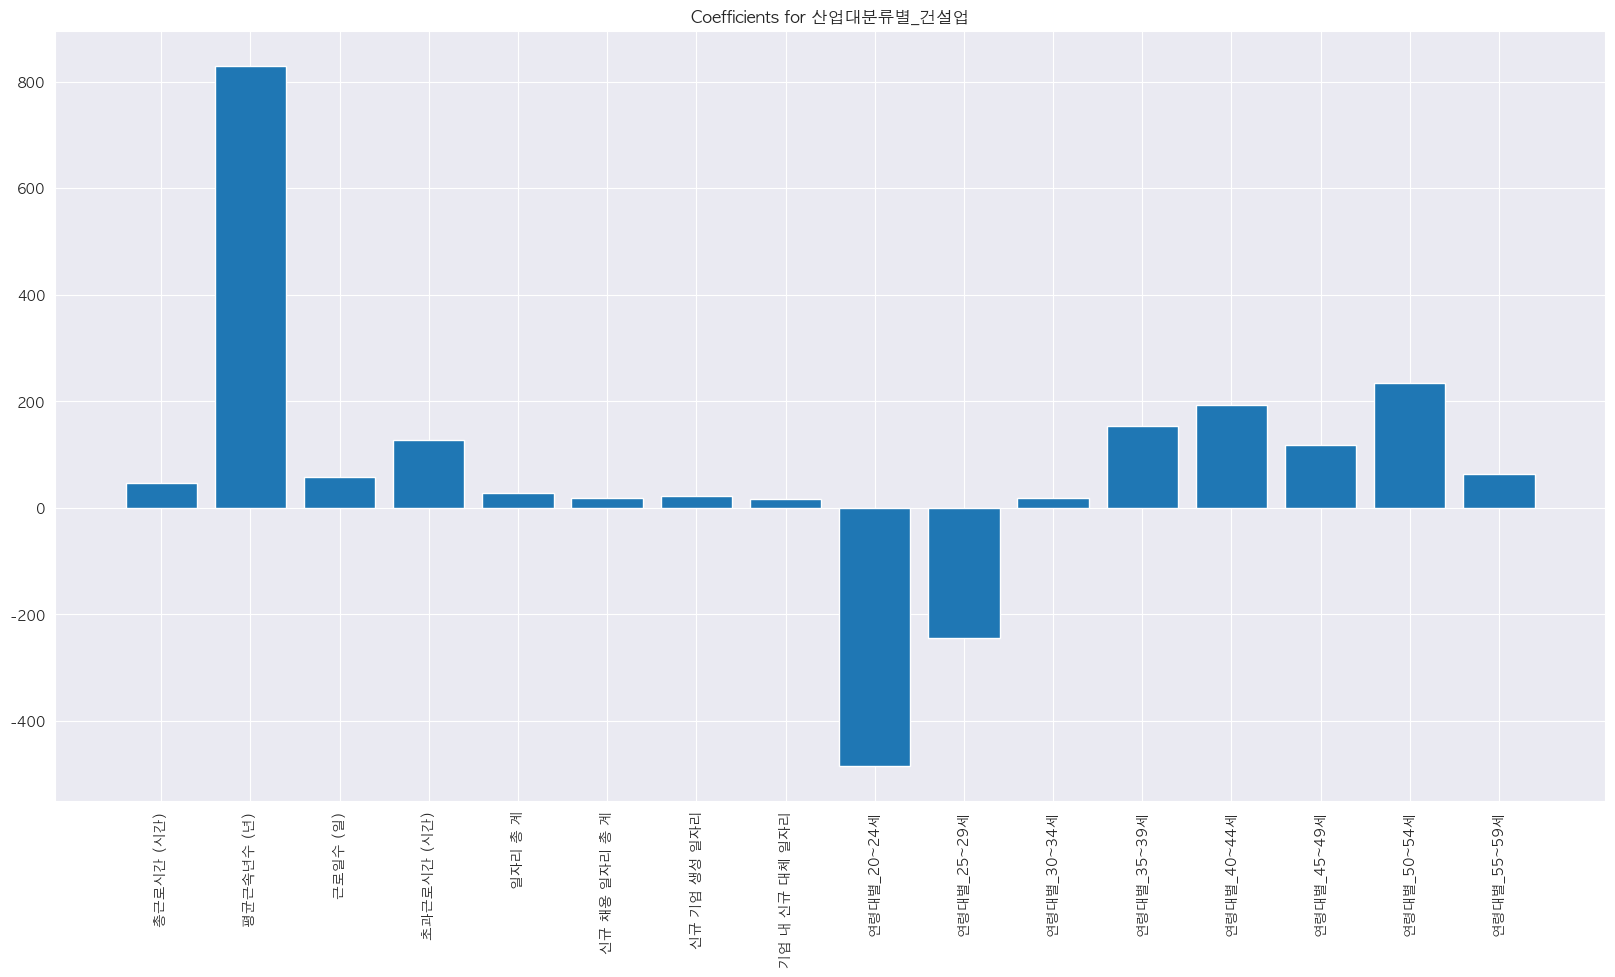

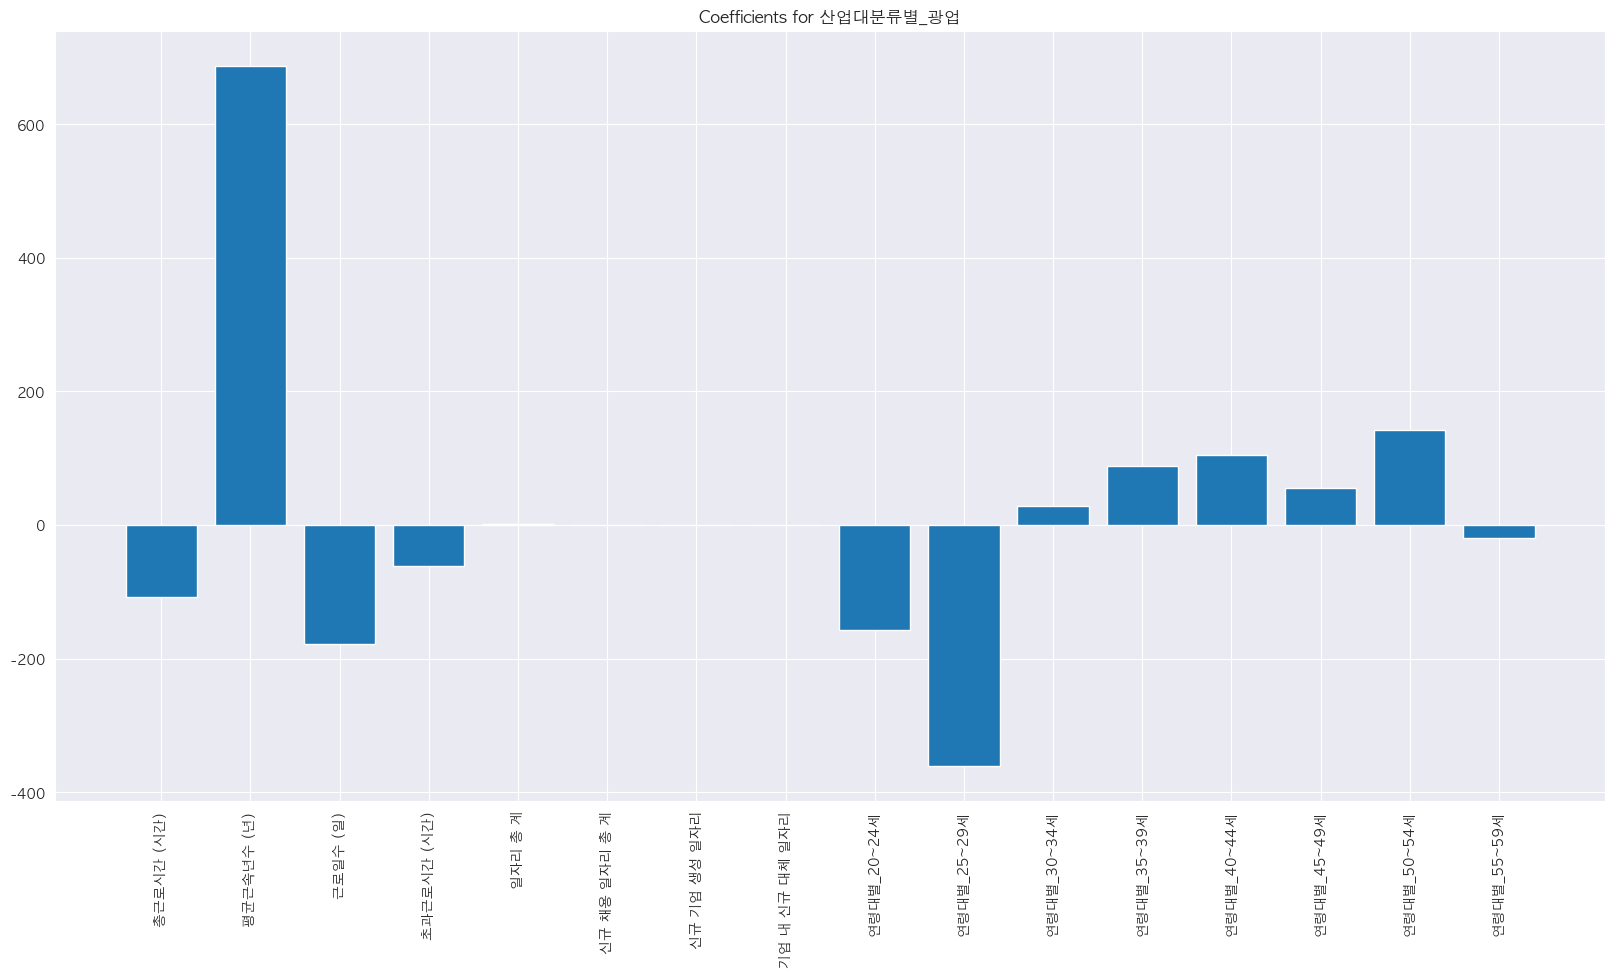

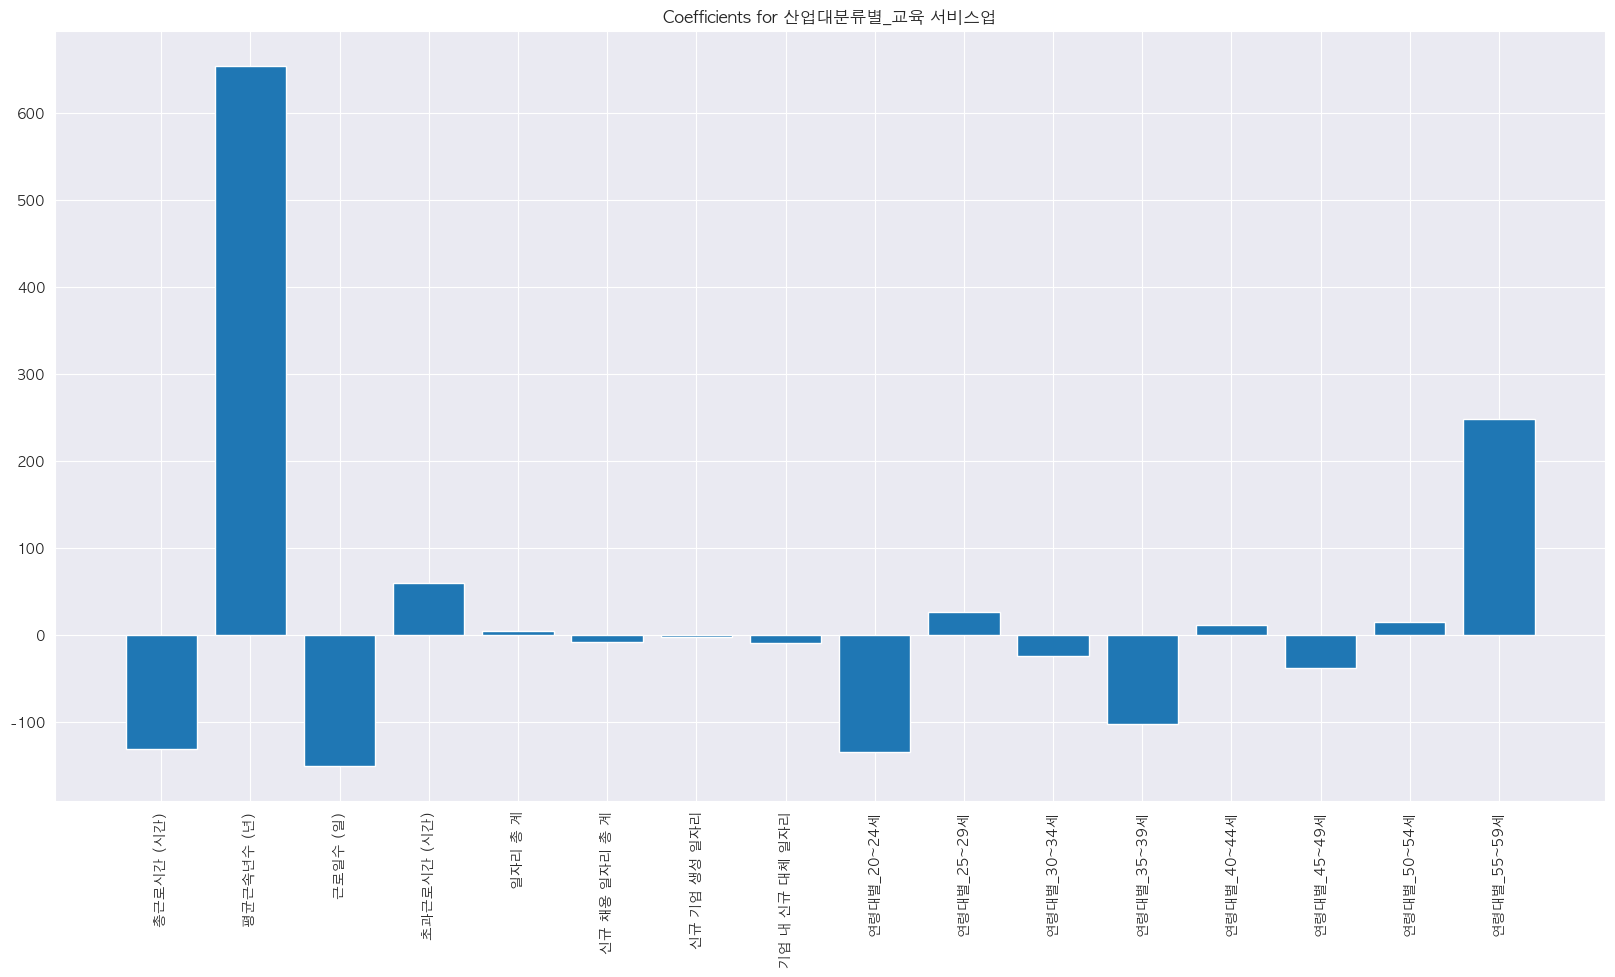

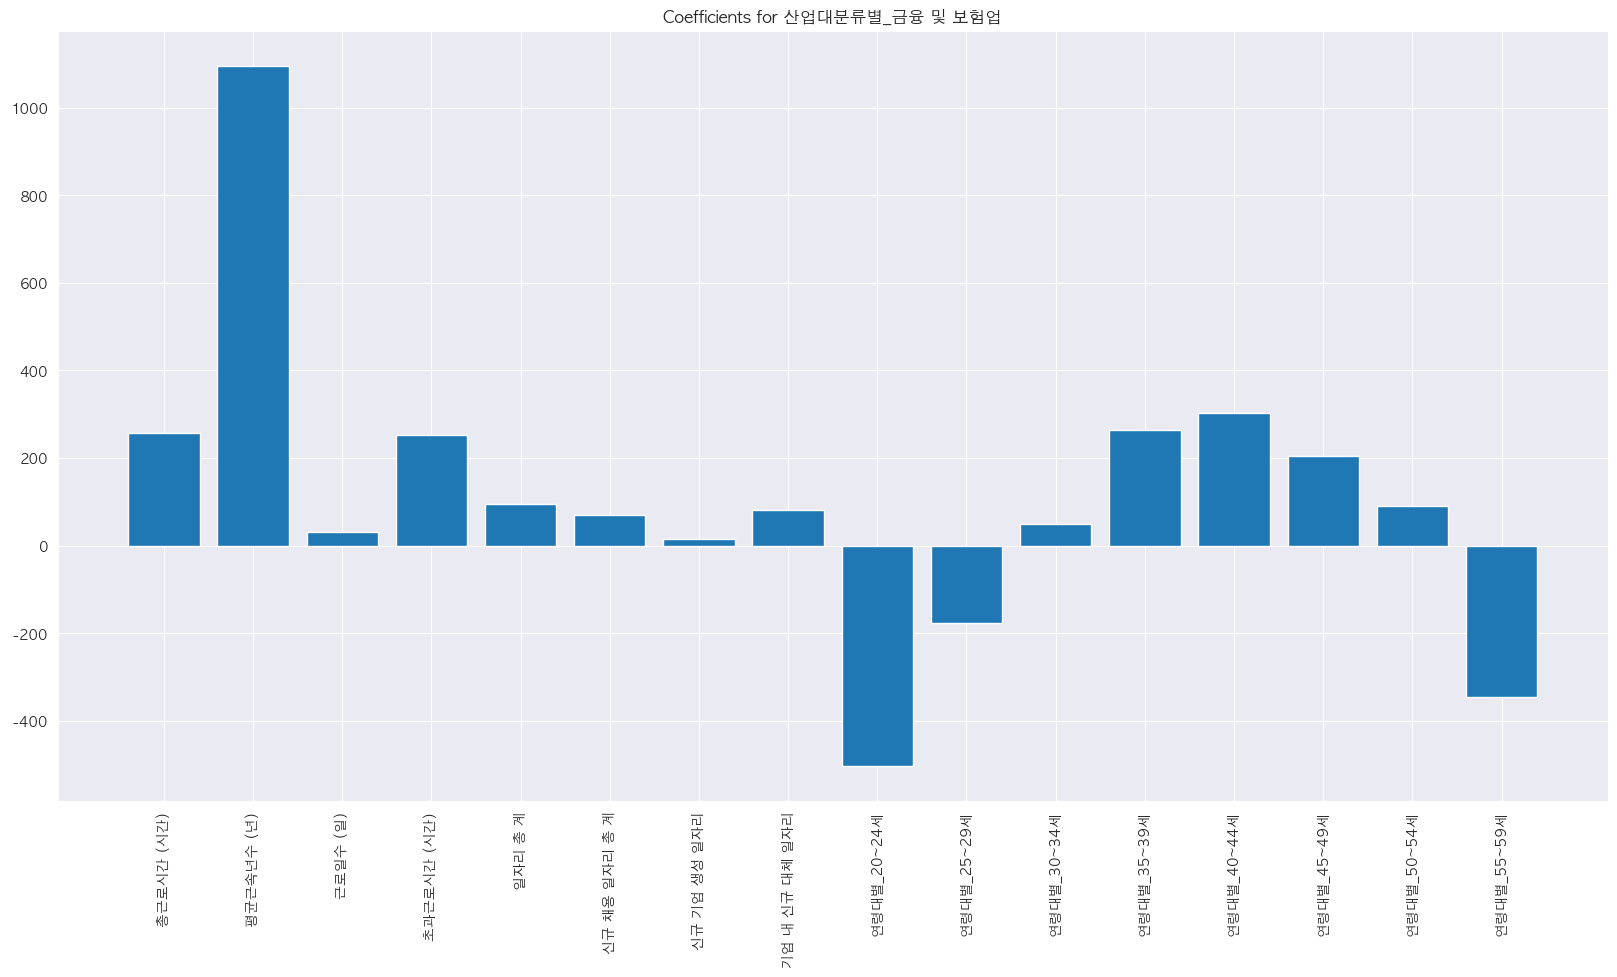

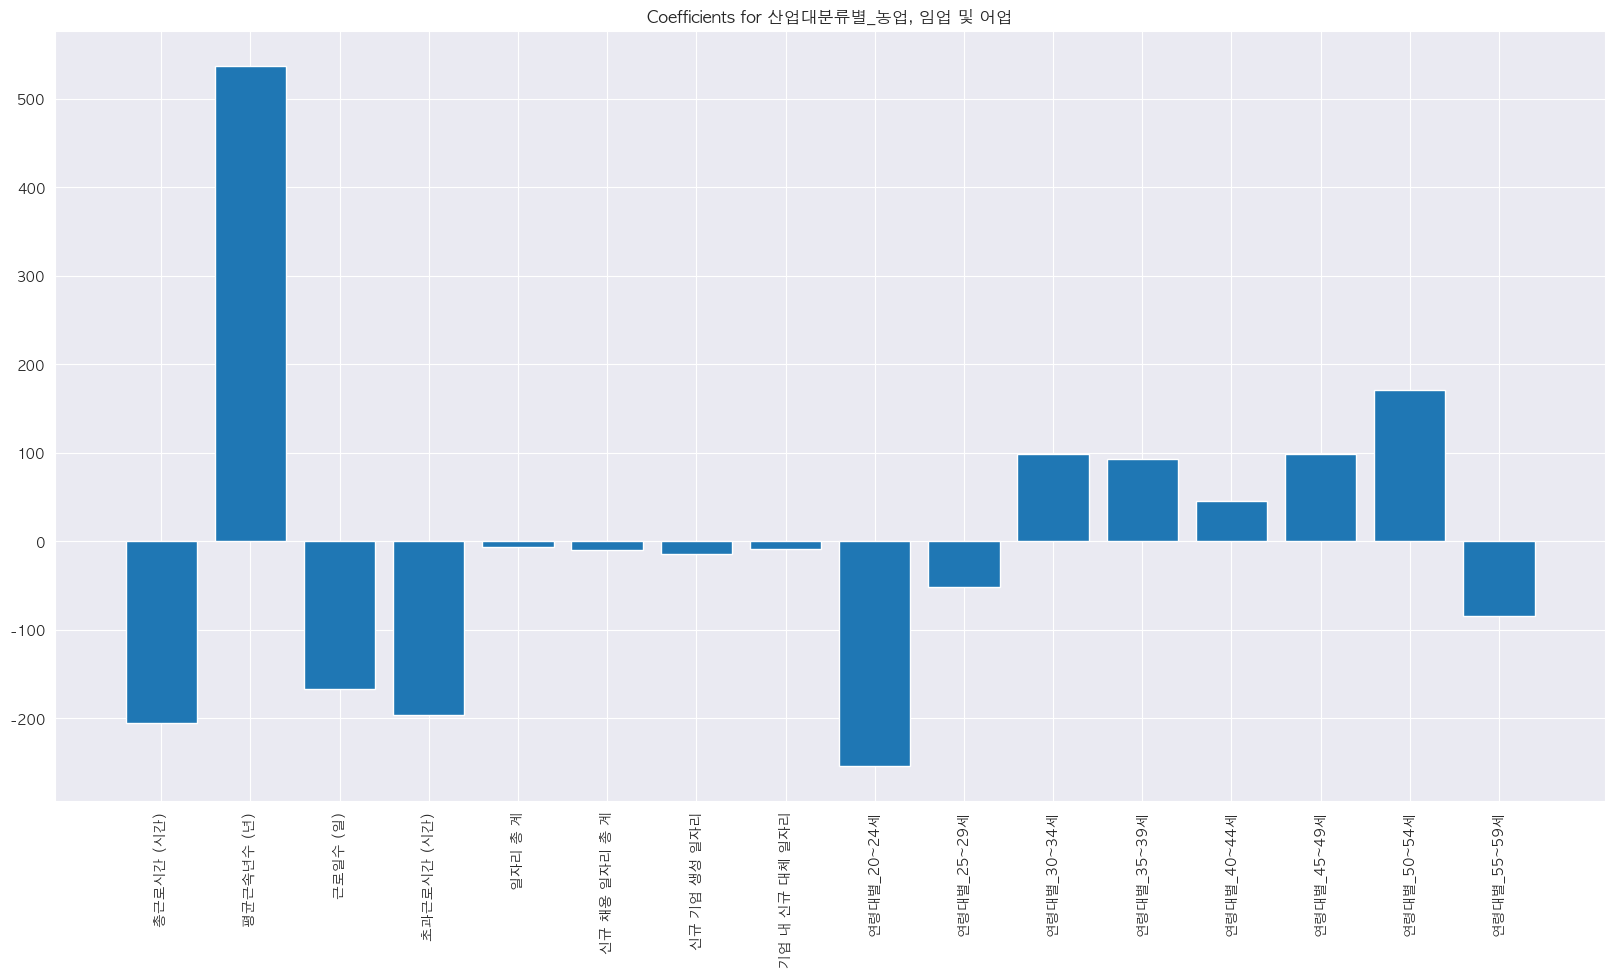

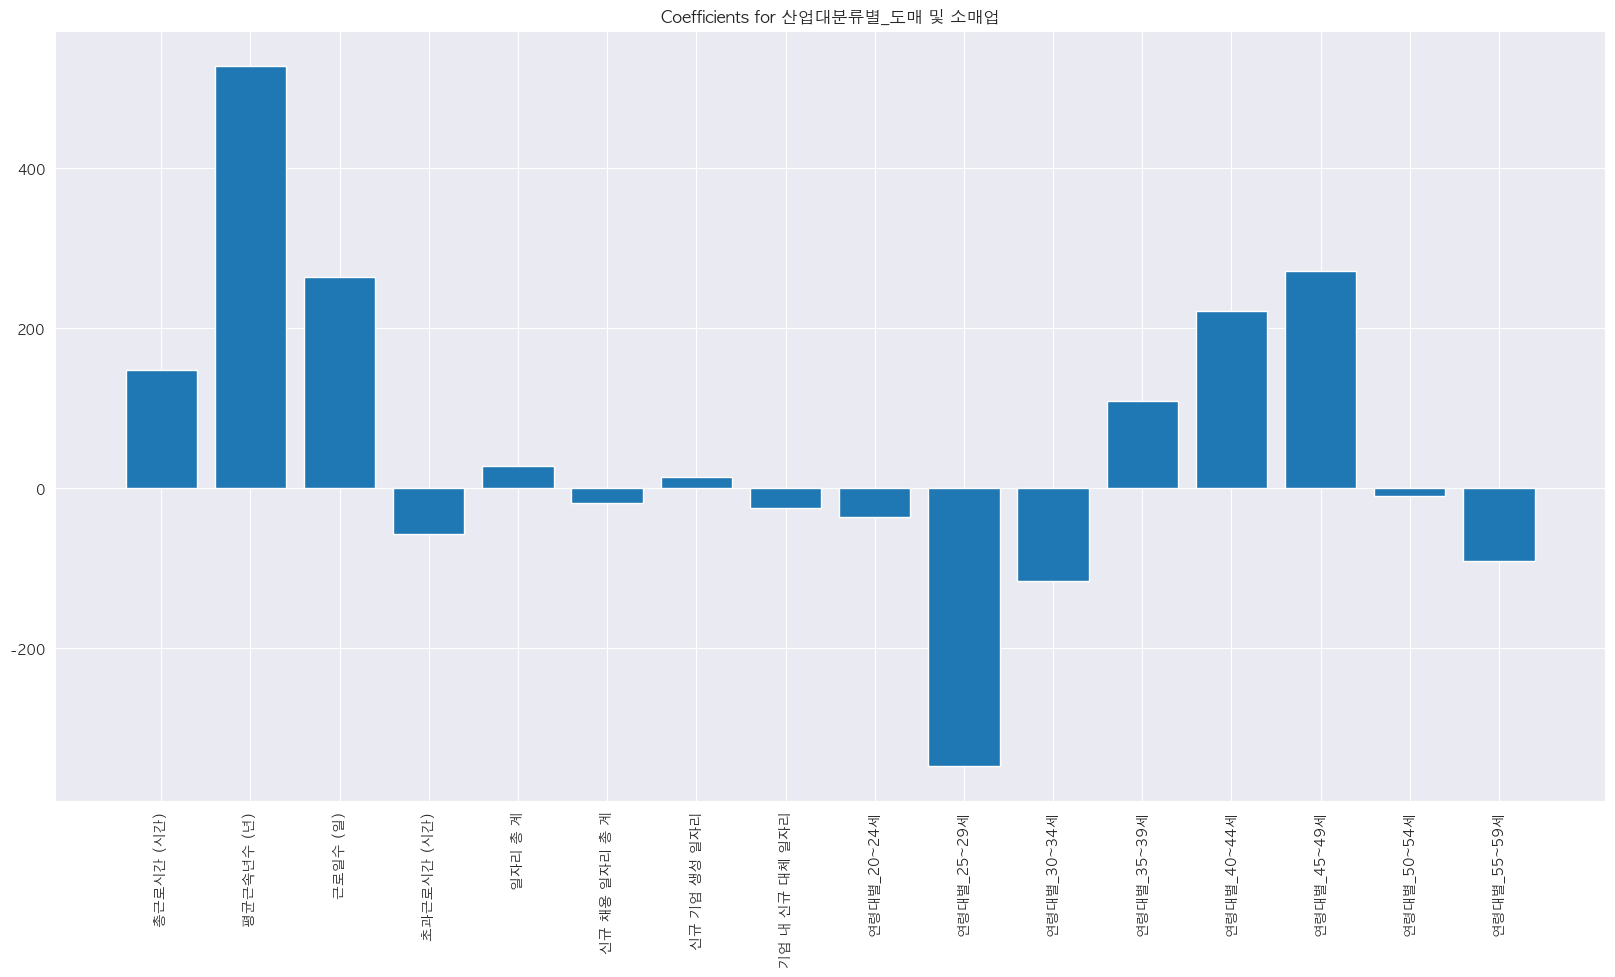

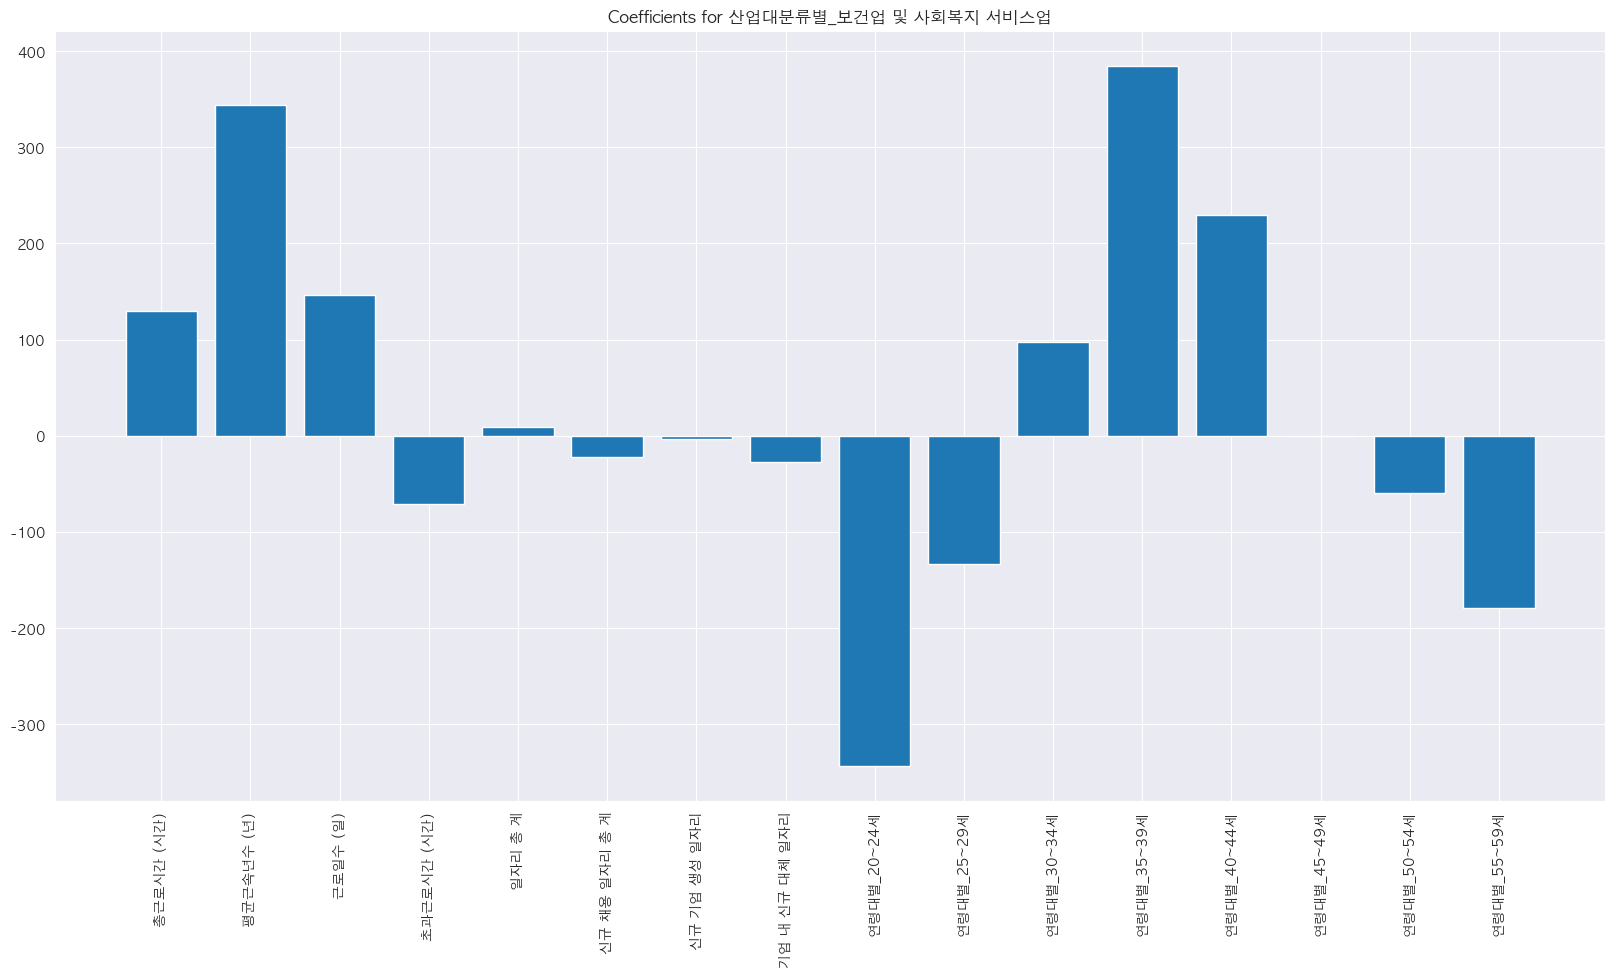

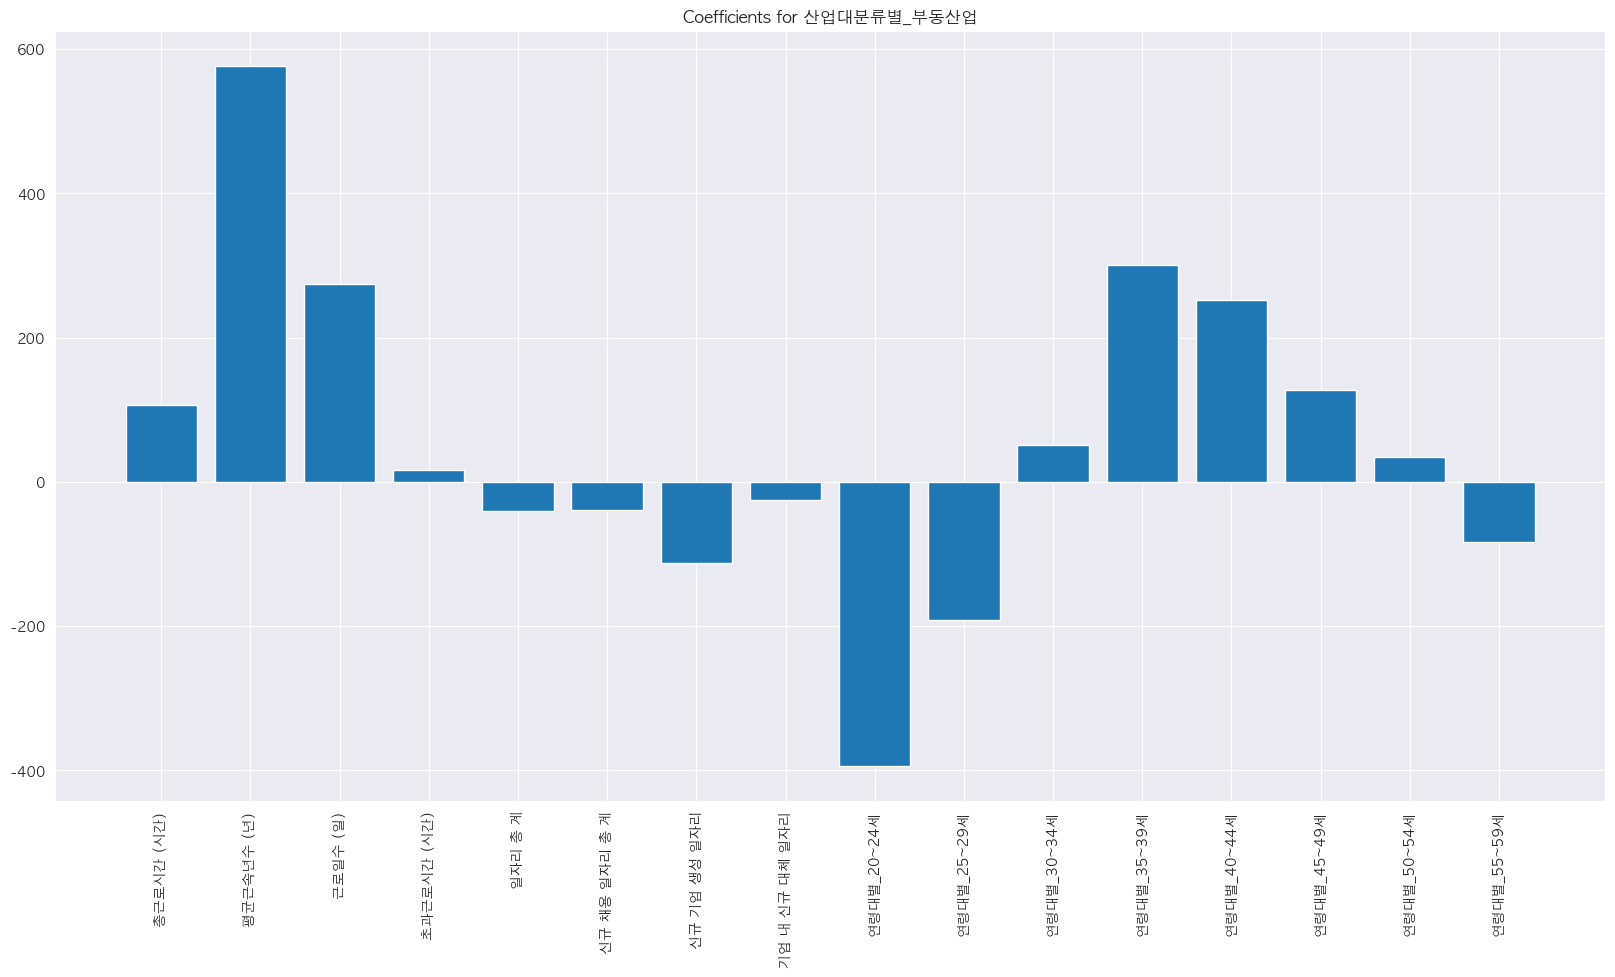

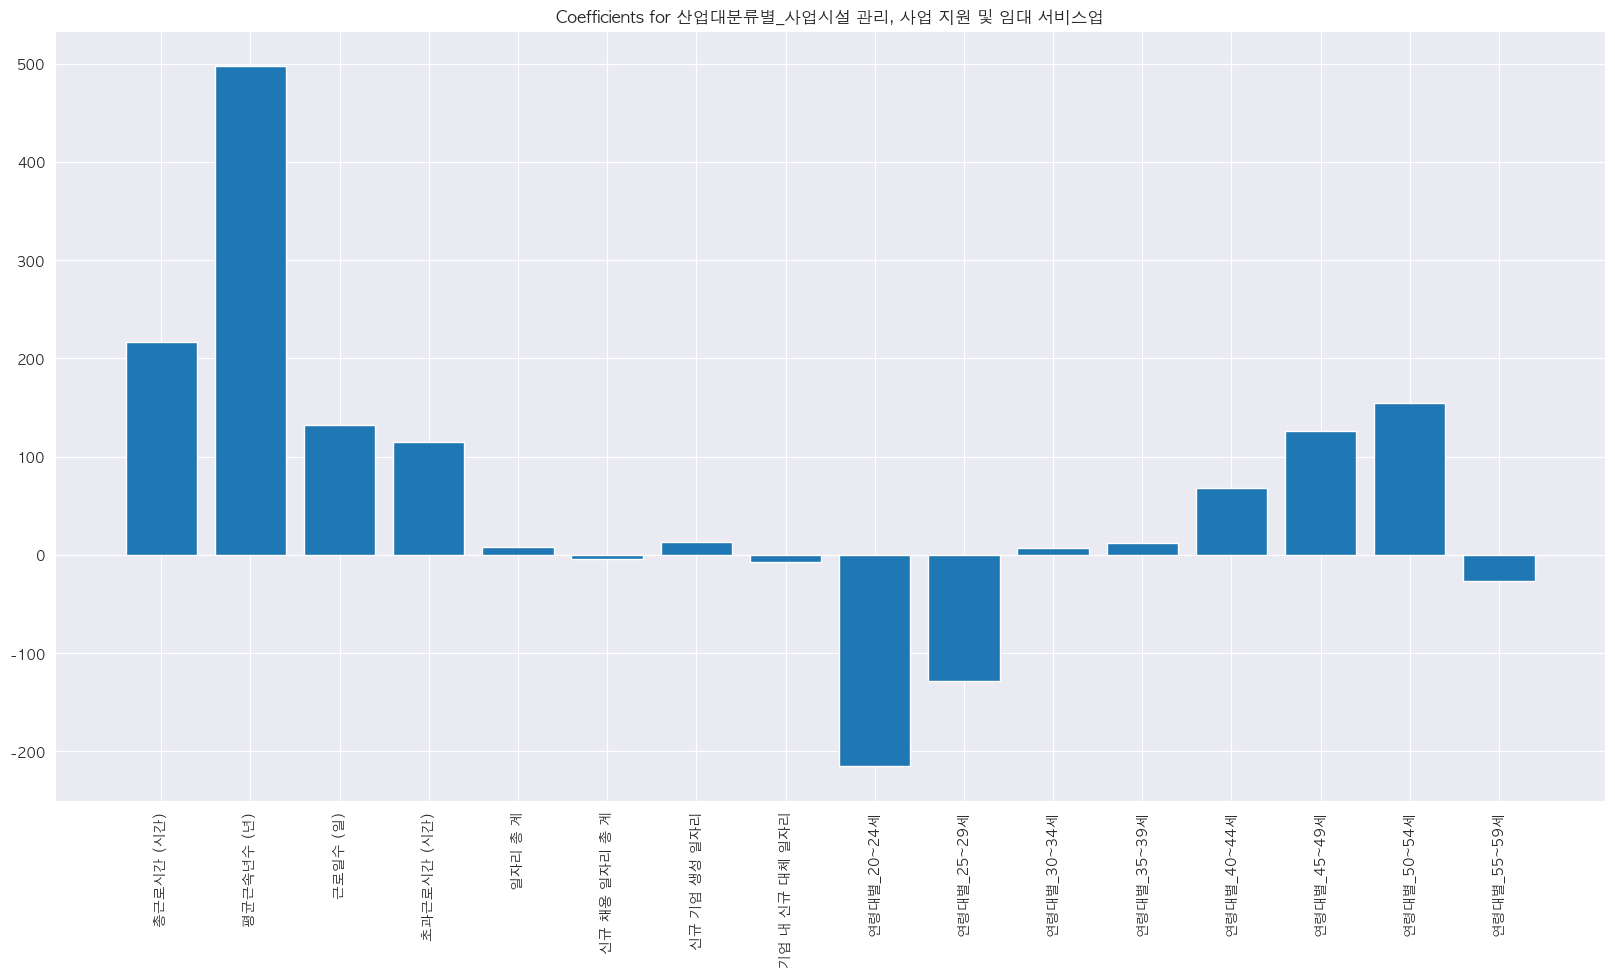

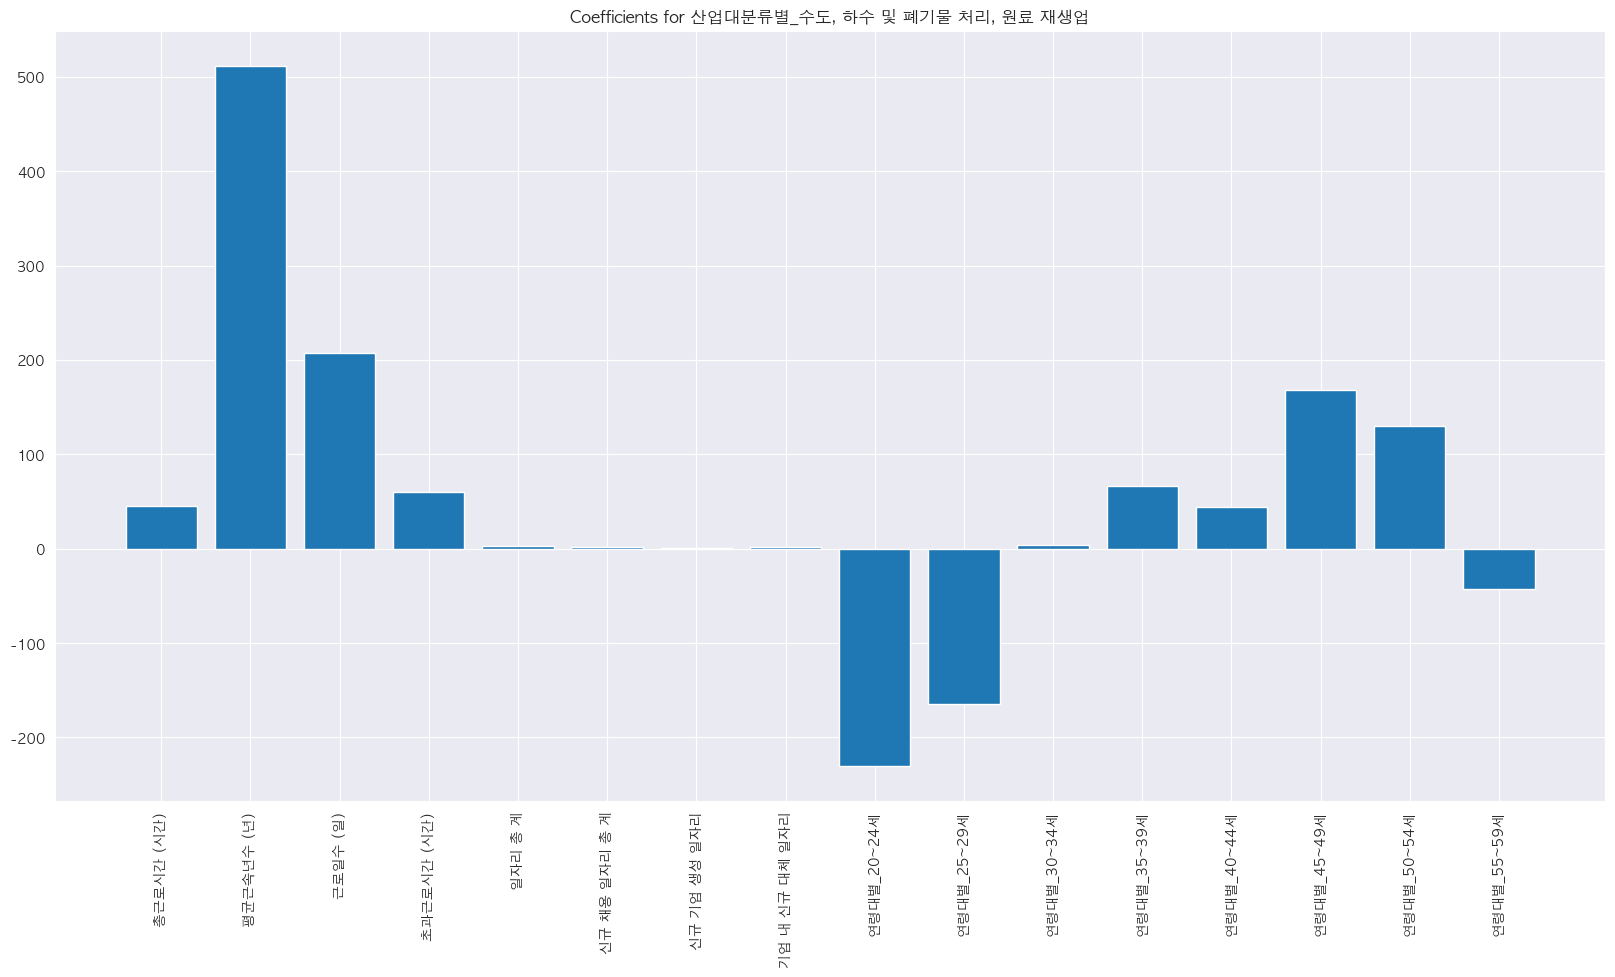

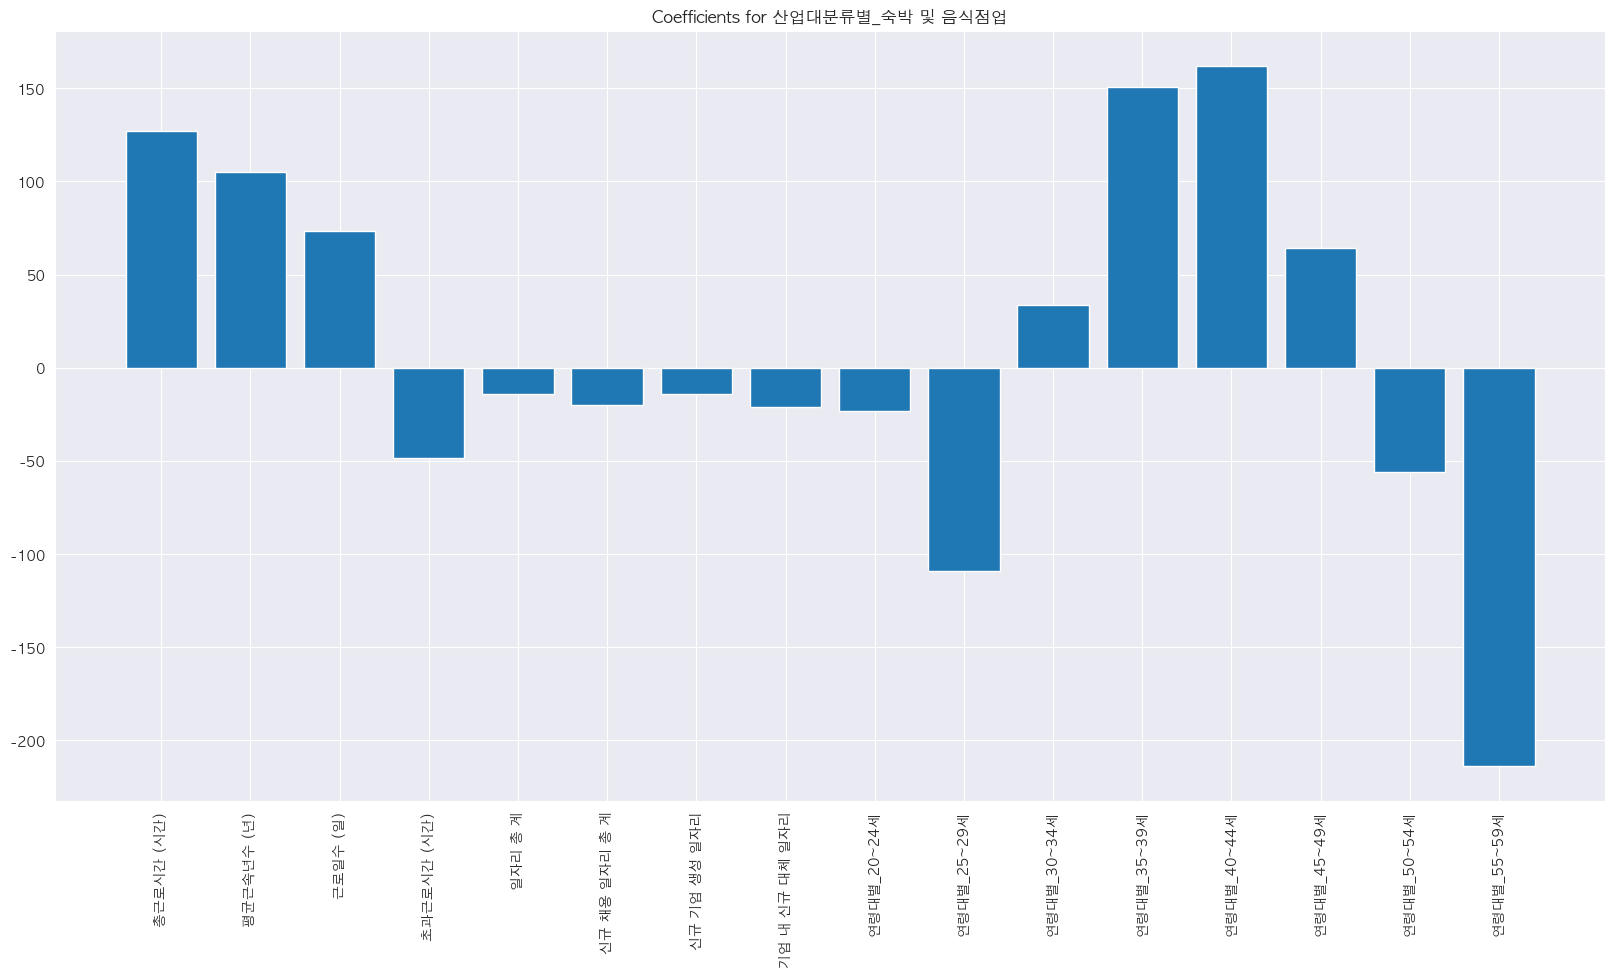

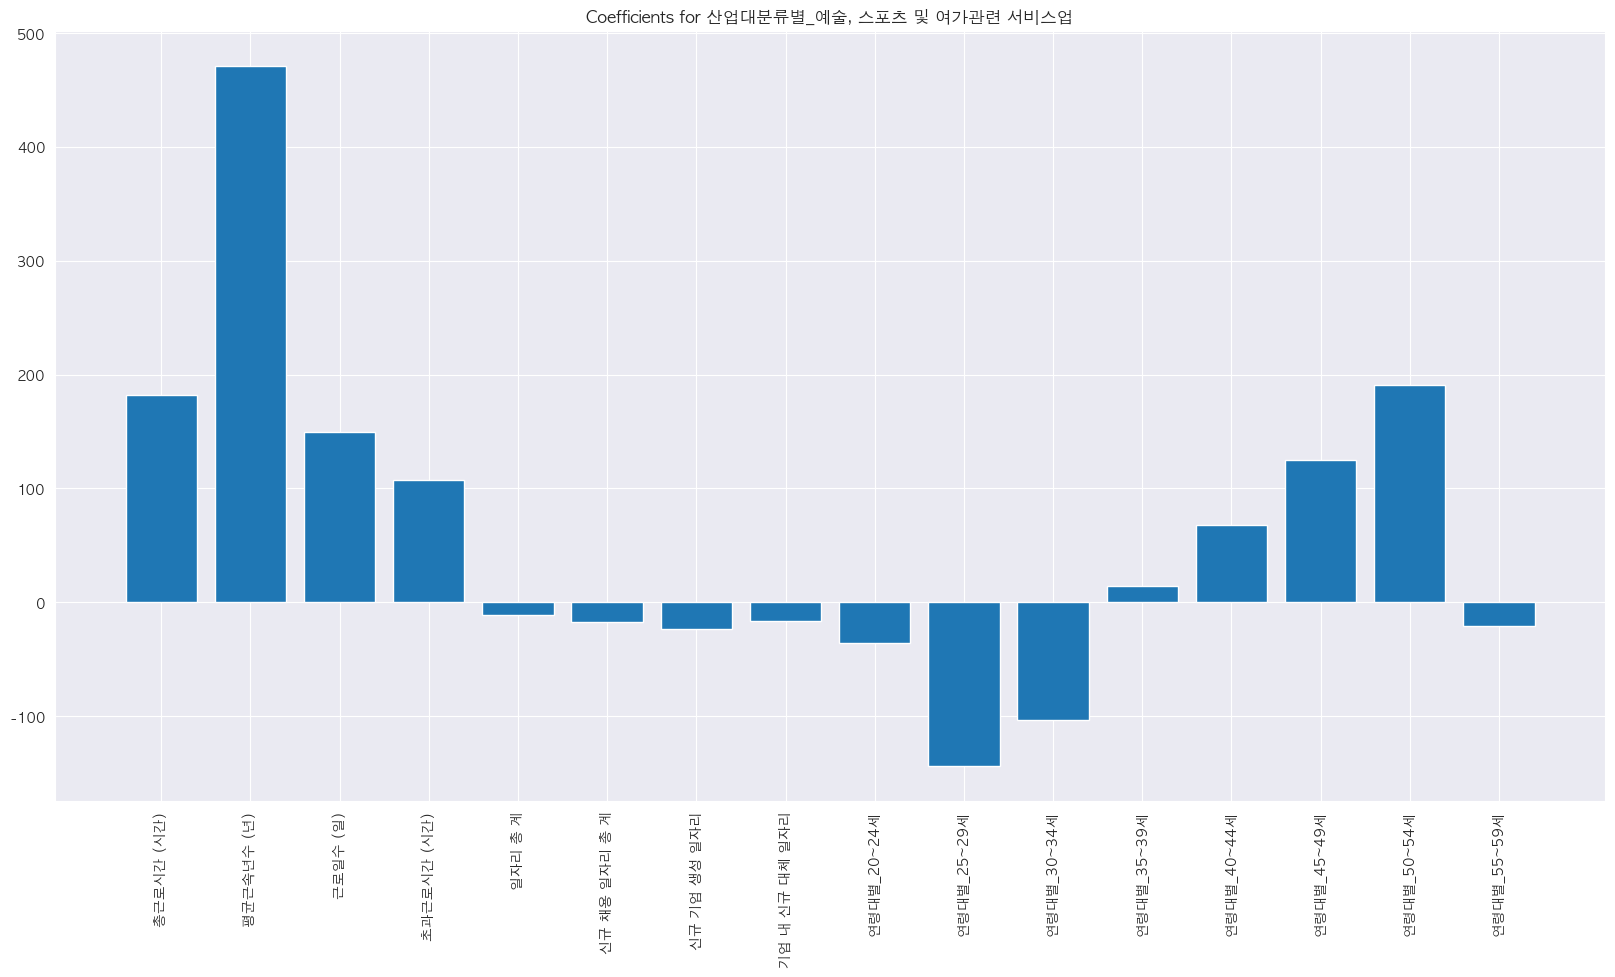

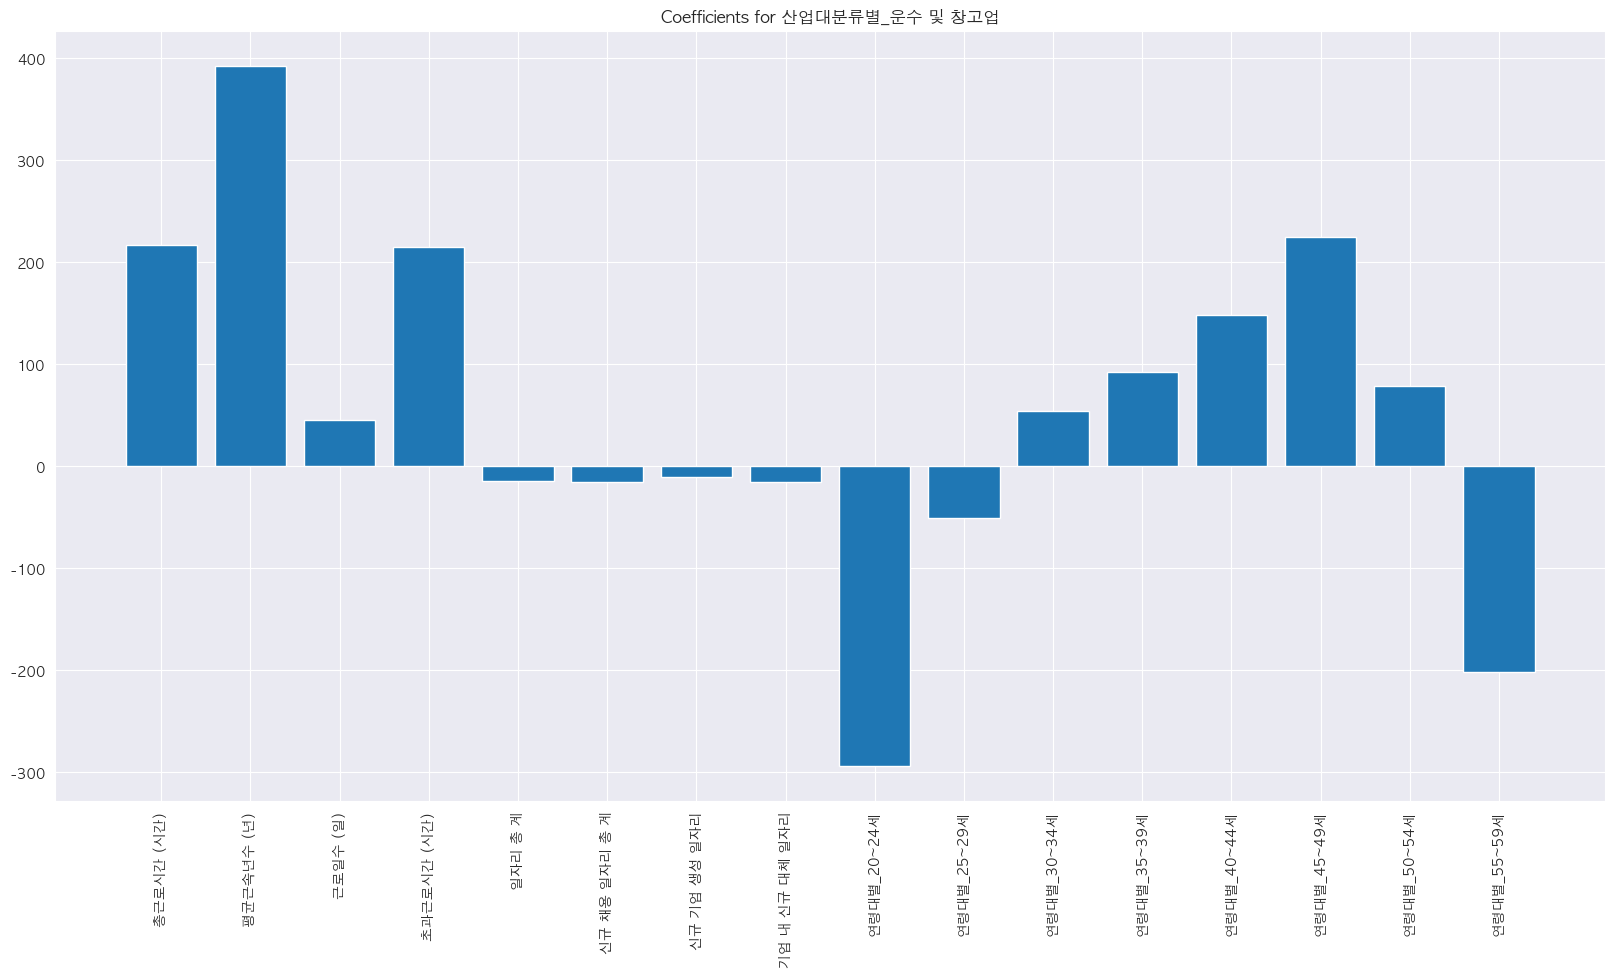

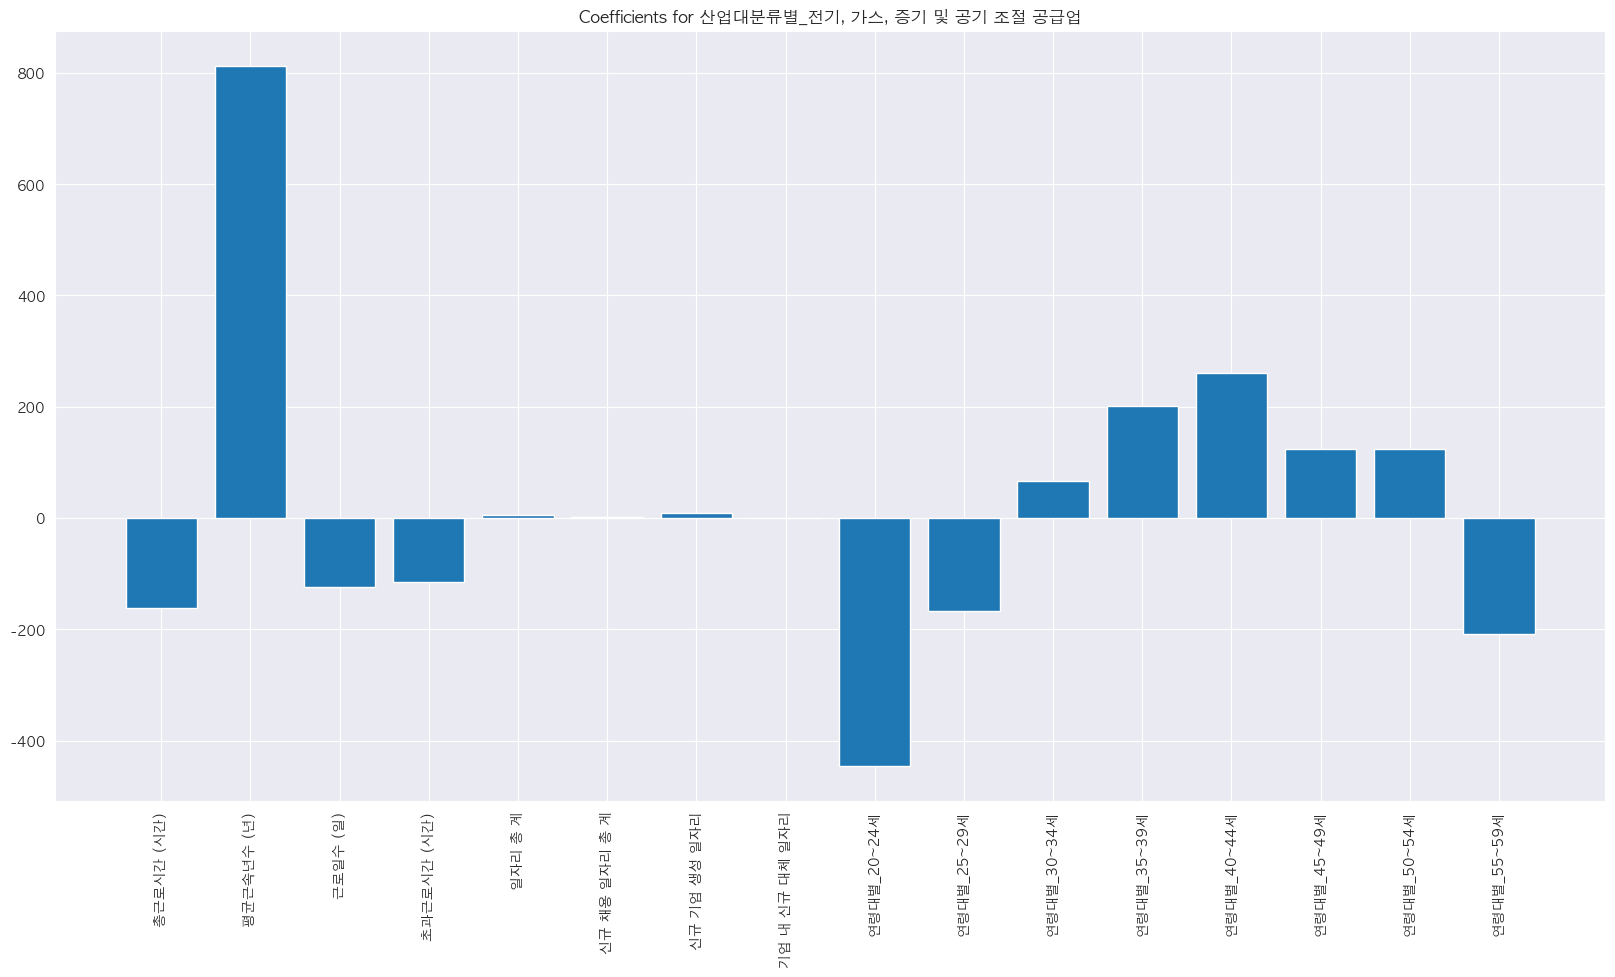

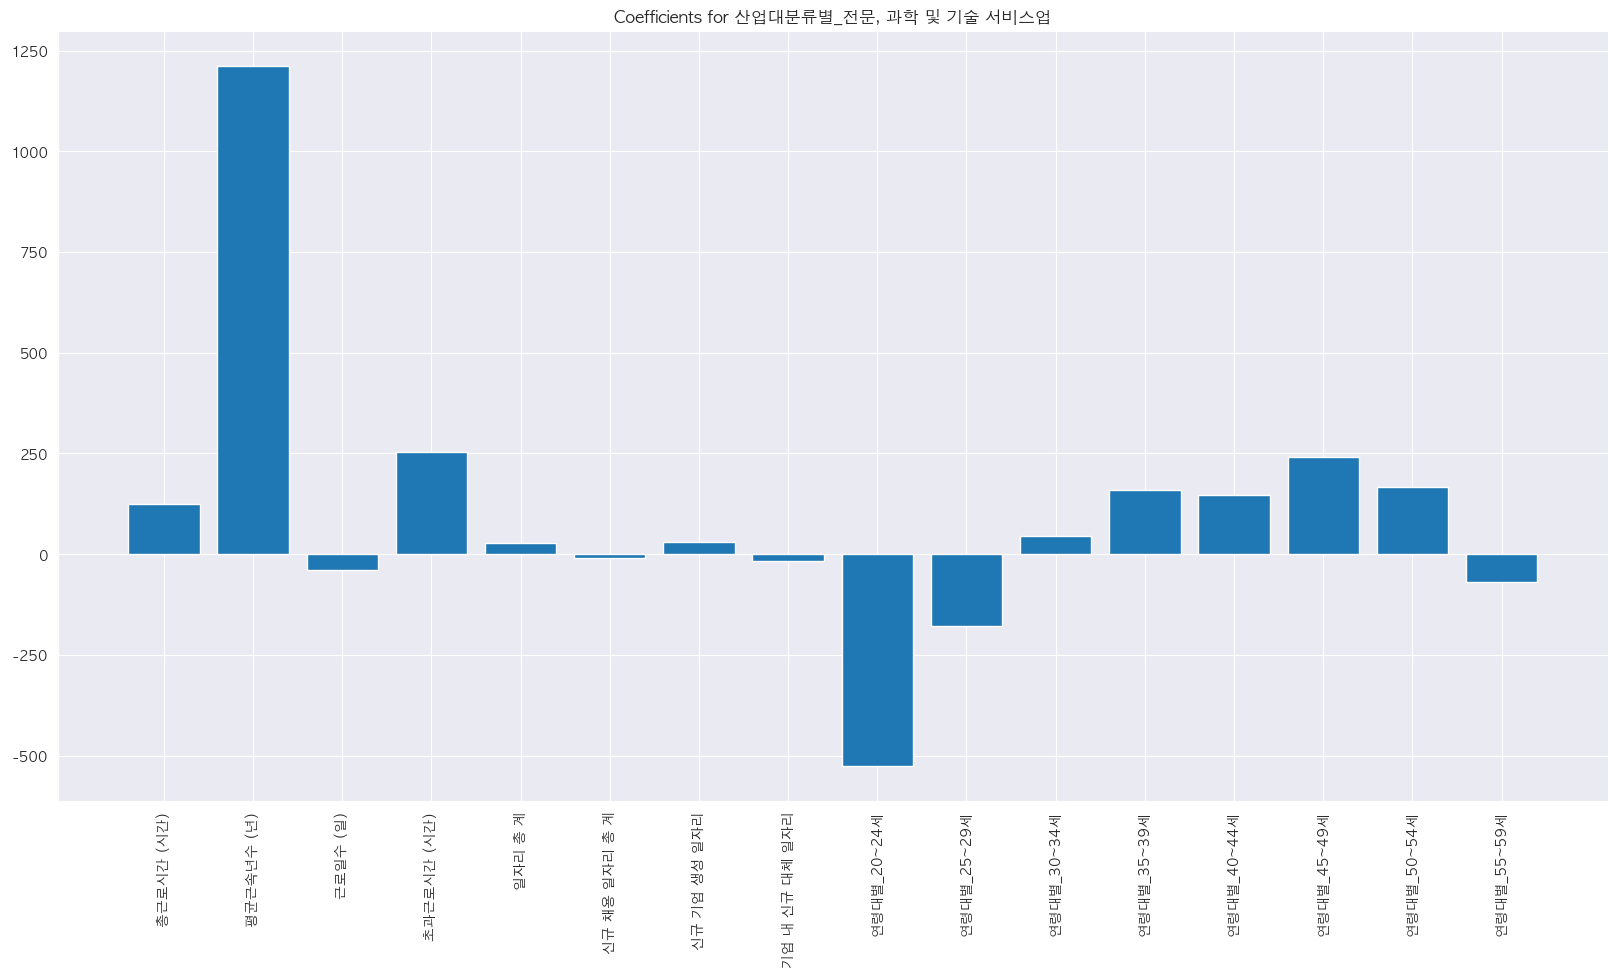

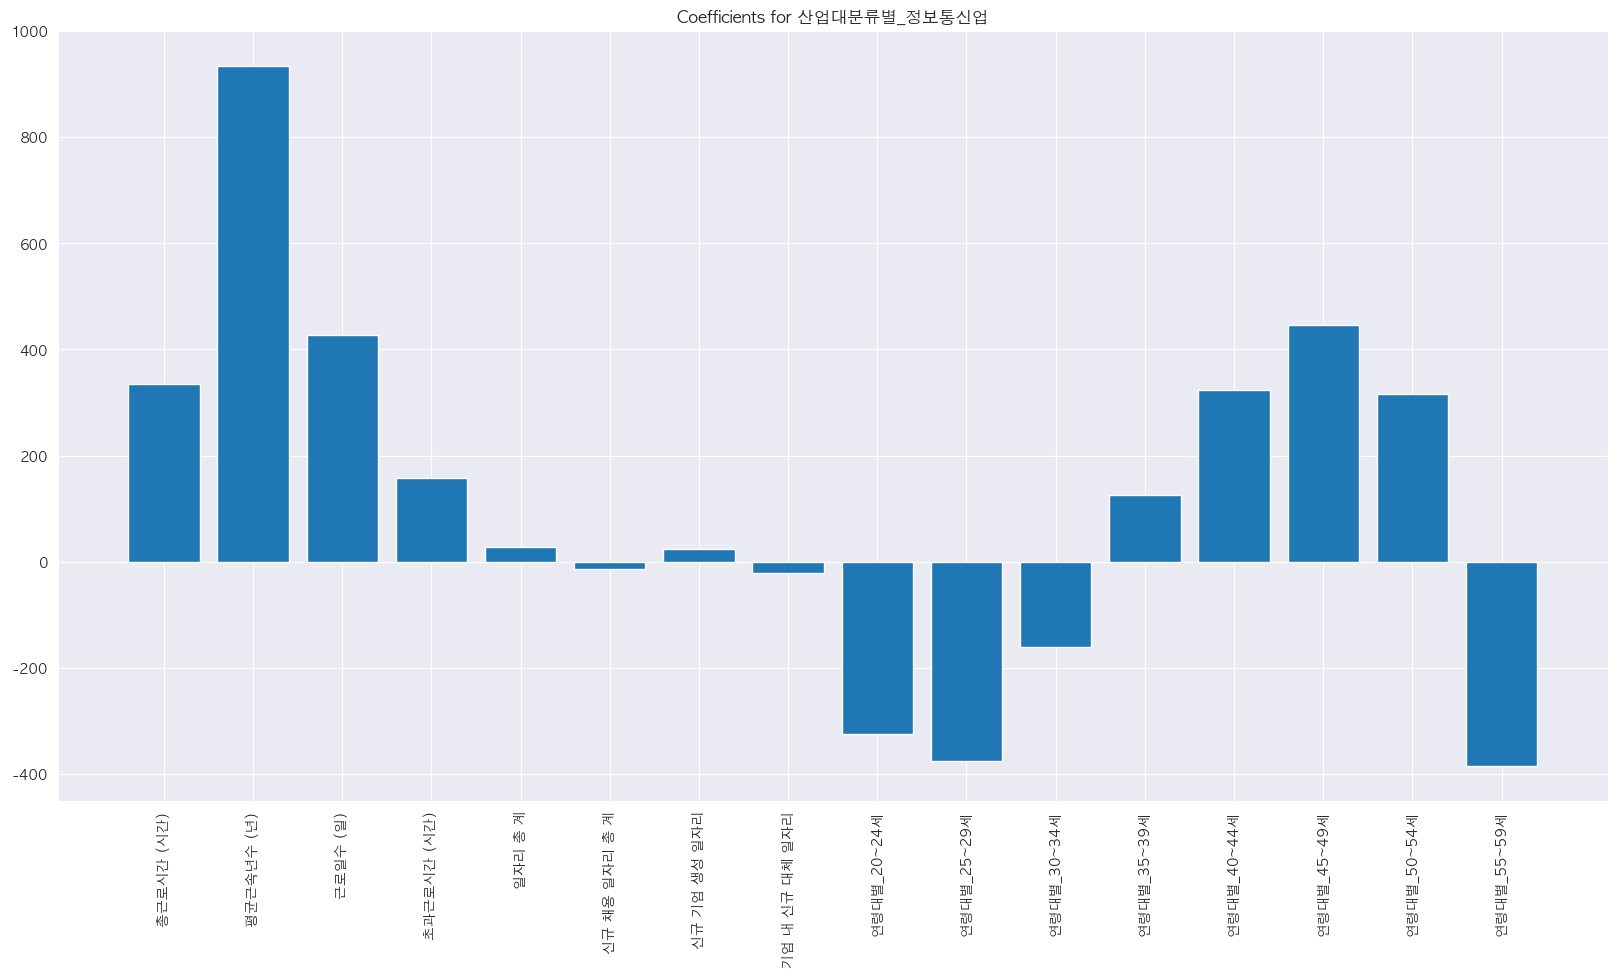

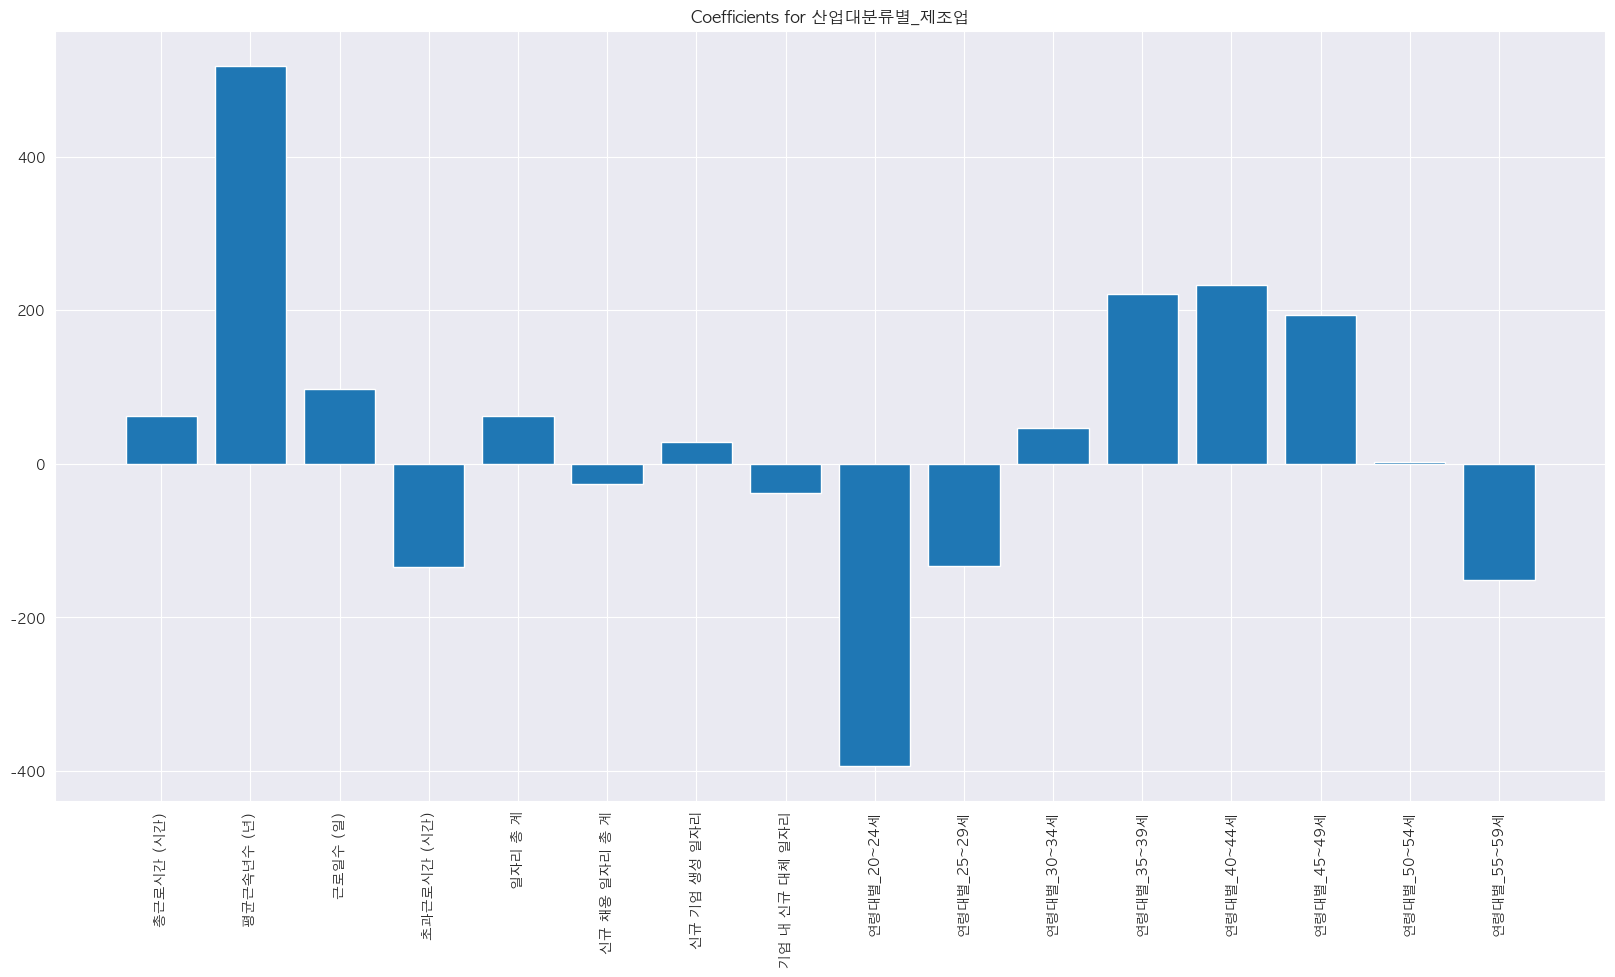

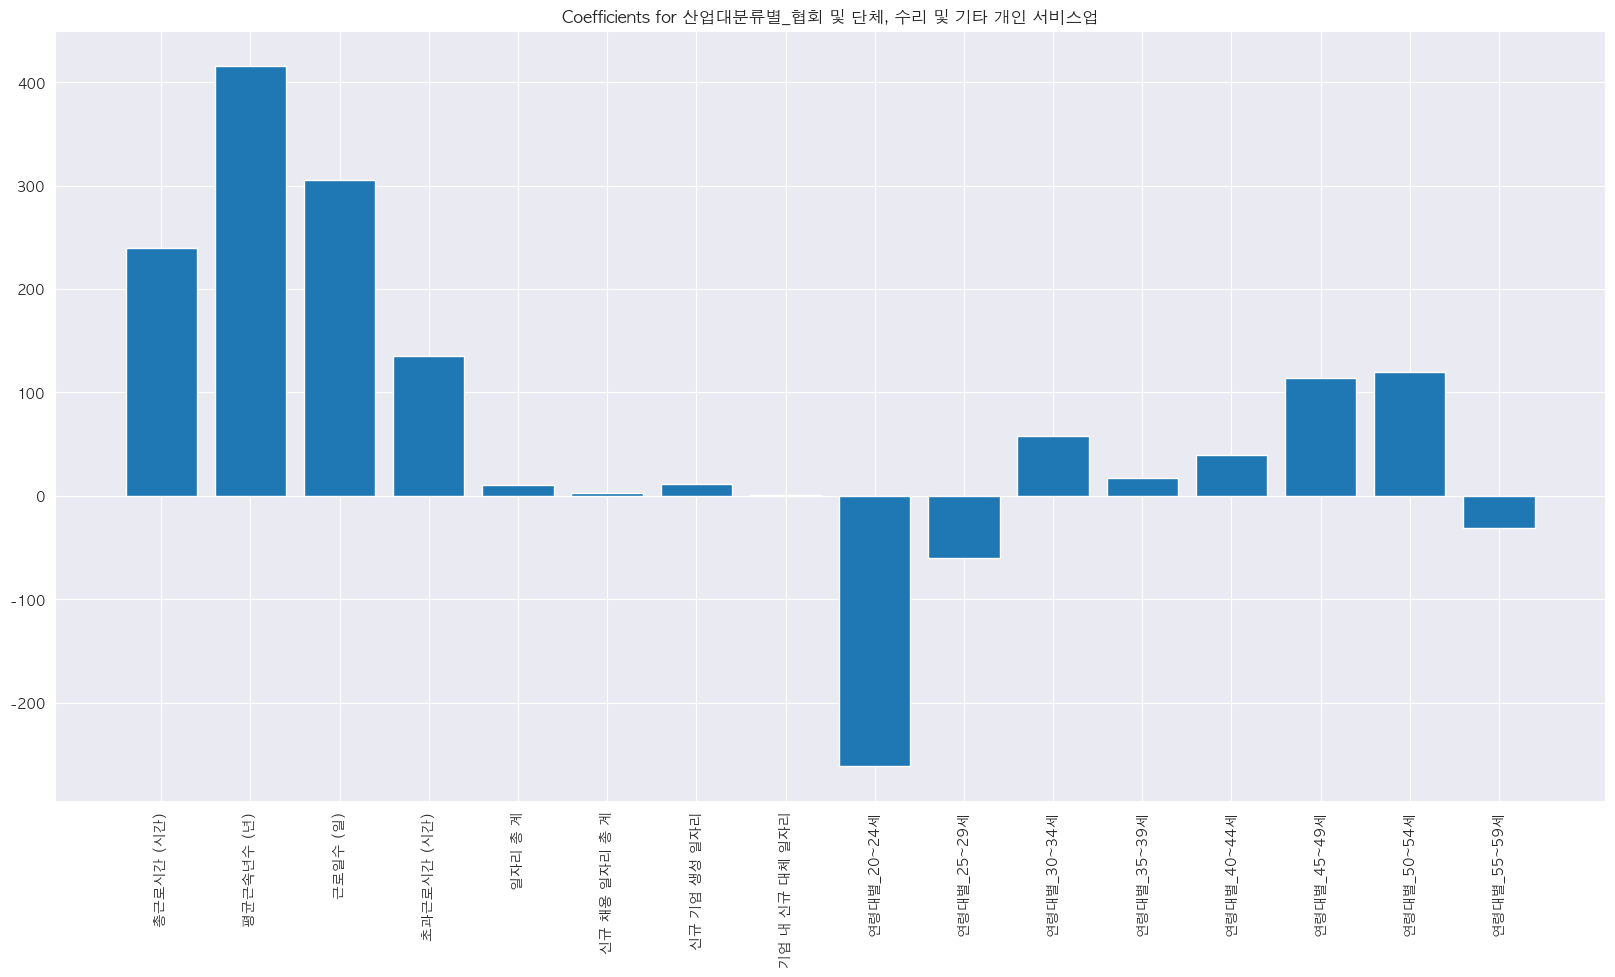

In [8]:
import matplotlib.pyplot as plt

feature_names = ['총근로시간 (시간)', '평균근속년수 (년)',
                     '근로일수 (일)','초과근로시간 (시간)',
        '일자리 총 계', '신규 채용 일자리 총 계',
        '신규 기업 생성 일자리', '기업 내 신규 대체 일자리']+ [col for col in df_with_dummies if col.startswith('연령대별_')]

for industry, model in results_dict.items():
    plt.figure(figsize=(20,10))
    plt.bar(feature_names, model.coef_)
    plt.title(f"Coefficients for {industry}")
    plt.xticks(rotation='vertical')
    plt.show()


## 요소별 상위 top3 하위 bottom3 시각화 + png 저장

In [10]:
import os

# 폴더 만들기
os.makedirs('plots', exist_ok=True)

# 각각의 산업에 대해
for feature in feature_names:
    # 상위 탑 3 , 하위 탑 3
    top_industries = feature_to_top_industries[feature][:3]
    bottom_industries = feature_to_bottom_industries[feature][:3]

    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.bar([i[1] for i in top_industries], [i[0] for i in top_industries])
    plt.title(f"Top 3 industries for '{feature}'")
    plt.xlabel('Industry')
    plt.ylabel('Coefficient')
    plt.xticks(rotation=90)


    plt.subplot(1, 2, 2)
    plt.bar([i[1] for i in bottom_industries], [i[0] for i in bottom_industries])
    plt.title(f"Bottom 3 industries for '{feature}'")
    plt.ylabel('Industry')
    plt.xlabel('Coefficient')
    plt.xticks(rotation=90)

    # 이미지 저장
    plt.tight_layout()
    plt.savefig(f'plots/{feature}.png')

    plt.close()


# 그렇다면 과연 총 근로시간및 초과근로 시간, 근로일 수가 가장 적으면서
# 동시에 평균 근속 년 수, 신규 채용 일자리 수, 월 임금 총액이 높은 산업은? (청년들이 원하는 직업군)

In [17]:
# 각 산업별 평균 값 얻기
job_opening_2019_df2 = pd.read_csv('2021_연령대별_산업대분류별_일자리.csv', encoding='cp949')
salary_2019_df2 = pd.read_csv('2021_산업_학력_연령계층_성별_임금_및_근로조건.csv', encoding='cp949')

searchIndustry_2019_df = pd.merge(job_opening_2019_df2, salary_2019_df2, on=['연령대별','산업대분류별',]) # 두 df 합치기

industry_means = searchIndustry_2019_df.groupby('산업대분류별').mean()

# conditions = (
#     (industry_means['총근로시간 (시간)'] <= industry_means['총근로시간 (시간)'].quantile(0.25)) &
#     (industry_means['초과근로시간 (시간)'] <= industry_means['초과근로시간 (시간)'].quantile(0.25)) &
#     (industry_means['근로일수 (일)'] <= industry_means['근로일수 (일)'].quantile(0.25)) &
#     (industry_means['평균근속년수 (년)'] >= industry_means['평균근속년수 (년)'].quantile(0.75)) &
#     (industry_means['신규 채용 일자리 총 계'] >= industry_means['신규 채용 일자리 총 계'].quantile(0.75)) &
#     (industry_means['월임금총액 (천원)'] >= industry_means['월임금총액 (천원)'].quantile(0.75))
# )
conditions = (
    (industry_means['총근로시간 (시간)'] <= industry_means['총근로시간 (시간)'].median()) &
    (industry_means['초과근로시간 (시간)'] <= industry_means['초과근로시간 (시간)'].median()) &
    (industry_means['근로일수 (일)'] <= industry_means['근로일수 (일)'].median()) &
    (industry_means['평균근속년수 (년)'] >= industry_means['평균근속년수 (년)'].median()) &
    (industry_means['신규 채용 일자리 총 계'] >= industry_means['신규 채용 일자리 총 계'].median()) &
    (industry_means['월임금총액 (천원)'] >= industry_means['월임금총액 (천원)'].median())
)

# Filter the industries based on these conditions
matching_industries = industry_means[conditions]

# Print the matching industries
matching_industries

/var/folders/s4/713_1lnn1yx1xmn2k_6k_9lh0000gn/T/ipykernel_96210/2137738079.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_means = searchIndustry_2019_df.groupby('산업대분류별').mean()


,일자리 총 계,신규 채용 일자리 총 계,신규 기업 생성 일자리,기업 내 신규 대체 일자리,평균근속년수 (년),총근로시간 (시간),월임금총액 (천원),근로일수 (일),초과근로시간 (시간)
산업대분류별,,,,,,,,,
"전문, 과학 및 기술 서비스업",23.2,5.522222,0.9,4.6,7.755556,176.922222,4975.222222,21.666667,5.533333


In [18]:
industry_means

,일자리 총 계,신규 채용 일자리 총 계,신규 기업 생성 일자리,기업 내 신규 대체 일자리,평균근속년수 (년),총근로시간 (시간),월임금총액 (천원),근로일수 (일),초과근로시간 (시간)
산업대분류별,,,,,,,,,
건설업,41.722222,15.555556,1.433333,14.144444,5.188889,180.533333,3789.777778,22.044444,7.044444
광업,0.244444,0.022222,0.000000,0.022222,7.088889,199.200000,4010.444444,23.322222,23.322222
교육 서비스업,31.955556,5.355556,0.677778,4.677778,6.788889,156.688889,3531.444444,20.144444,3.144444
금융 및 보험업,22.488889,4.811111,0.133333,4.700000,11.677778,176.777778,5995.333333,21.644444,5.044444
"농업, 임업 및 어업",2.700000,0.911111,0.233333,0.700000,8.666667,180.533333,3474.333333,22.511111,5.200000
도매 및 소매업,65.900000,17.411111,5.077778,12.322222,6.155556,172.755556,3695.888889,21.666667,4.800000
보건업 및 사회복지 서비스업,46.955556,11.855556,1.100000,10.777778,4.466667,167.944444,3007.111111,22.077778,5.633333
부동산업,20.055556,4.977778,2.433333,2.555556,4.822222,183.111111,3401.444444,21.111111,3.455556
"사업시설 관리, 사업 지원 및 임대 서비스업",28.711111,9.666667,1.511111,8.133333,6.133333,177.255556,3192.333333,21.677778,8.377778
